# SC1015-Mini Project-FCE3-Team 7
## 🫀 **Heart Attack Risk Analysis and Verification**🫀
*Yalamanchili Sanjana* & *Mahi Pandey*



In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression



# Importing the Dataset

In [3]:
heartData = pd.read_csv('heart.csv')
heartData.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heartData.shape

(303, 14)

DATA DICTIONARY  

NUMERIC

age - Age of the patient

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

thalachh - Maximum heart rate achieved

caa - Number of Major Vessels Colored by Fluoroscopy

CATEGORICAL

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

oldpeak - Previous peak

exng - Exercise induced angina ~ 1 = Yes, 0 = No

thall - Thalium Stress Test result ~ (0,3)

slp - Slope

TARGET

output - Target variable

# Data Cleaning

In [5]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heartData.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Since there are no NaN values in the dataset, data cleaning is not necessary.

In [7]:
heartData[heartData.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
heartData.drop_duplicates(keep='first',inplace=True)

We found one duplicate value and hence have dropped it.

# Explorartory Data Analysis

In [9]:
heartData.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
heartData.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


# Categorical Visualisation

In [11]:
catHeart = heartData[["sex","exng","cp","fbs","restecg","slp","thall","output"]]

In [12]:
catHeart.describe()

,sex,exng,cp,fbs,restecg,slp,thall,output
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.682119,0.327815,0.963576,0.149007,0.526490,1.397351,2.314570,0.543046
std,0.466426,0.470196,1.032044,0.356686,0.526027,0.616274,0.613026,0.498970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,1.000000,2.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,3.000000,1.000000


In [13]:
catHeart.corr()

,sex,exng,cp,fbs,restecg,slp,thall,output
sex,1.000000,0.143460,-0.051740,0.046022,-0.060351,-0.032990,0.211452,-0.283609
exng,0.143460,1.000000,-0.392937,0.024729,-0.068807,-0.256106,0.205826,-0.435601
cp,-0.051740,-0.392937,1.000000,0.096018,0.041561,0.116854,-0.160370,0.432080
fbs,0.046022,0.024729,0.096018,1.000000,-0.083081,-0.058654,-0.032752,-0.026826
restecg,-0.060351,-0.068807,0.041561,-0.083081,1.000000,0.090402,-0.010473,0.134874
slp,-0.032990,-0.256106,0.116854,-0.058654,0.090402,1.000000,-0.103314,0.343940
thall,0.211452,0.205826,-0.160370,-0.032752,-0.010473,-0.103314,1.000000,-0.343101
output,-0.283609,-0.435601,0.432080,-0.026826,0.134874,0.343940,-0.343101,1.000000


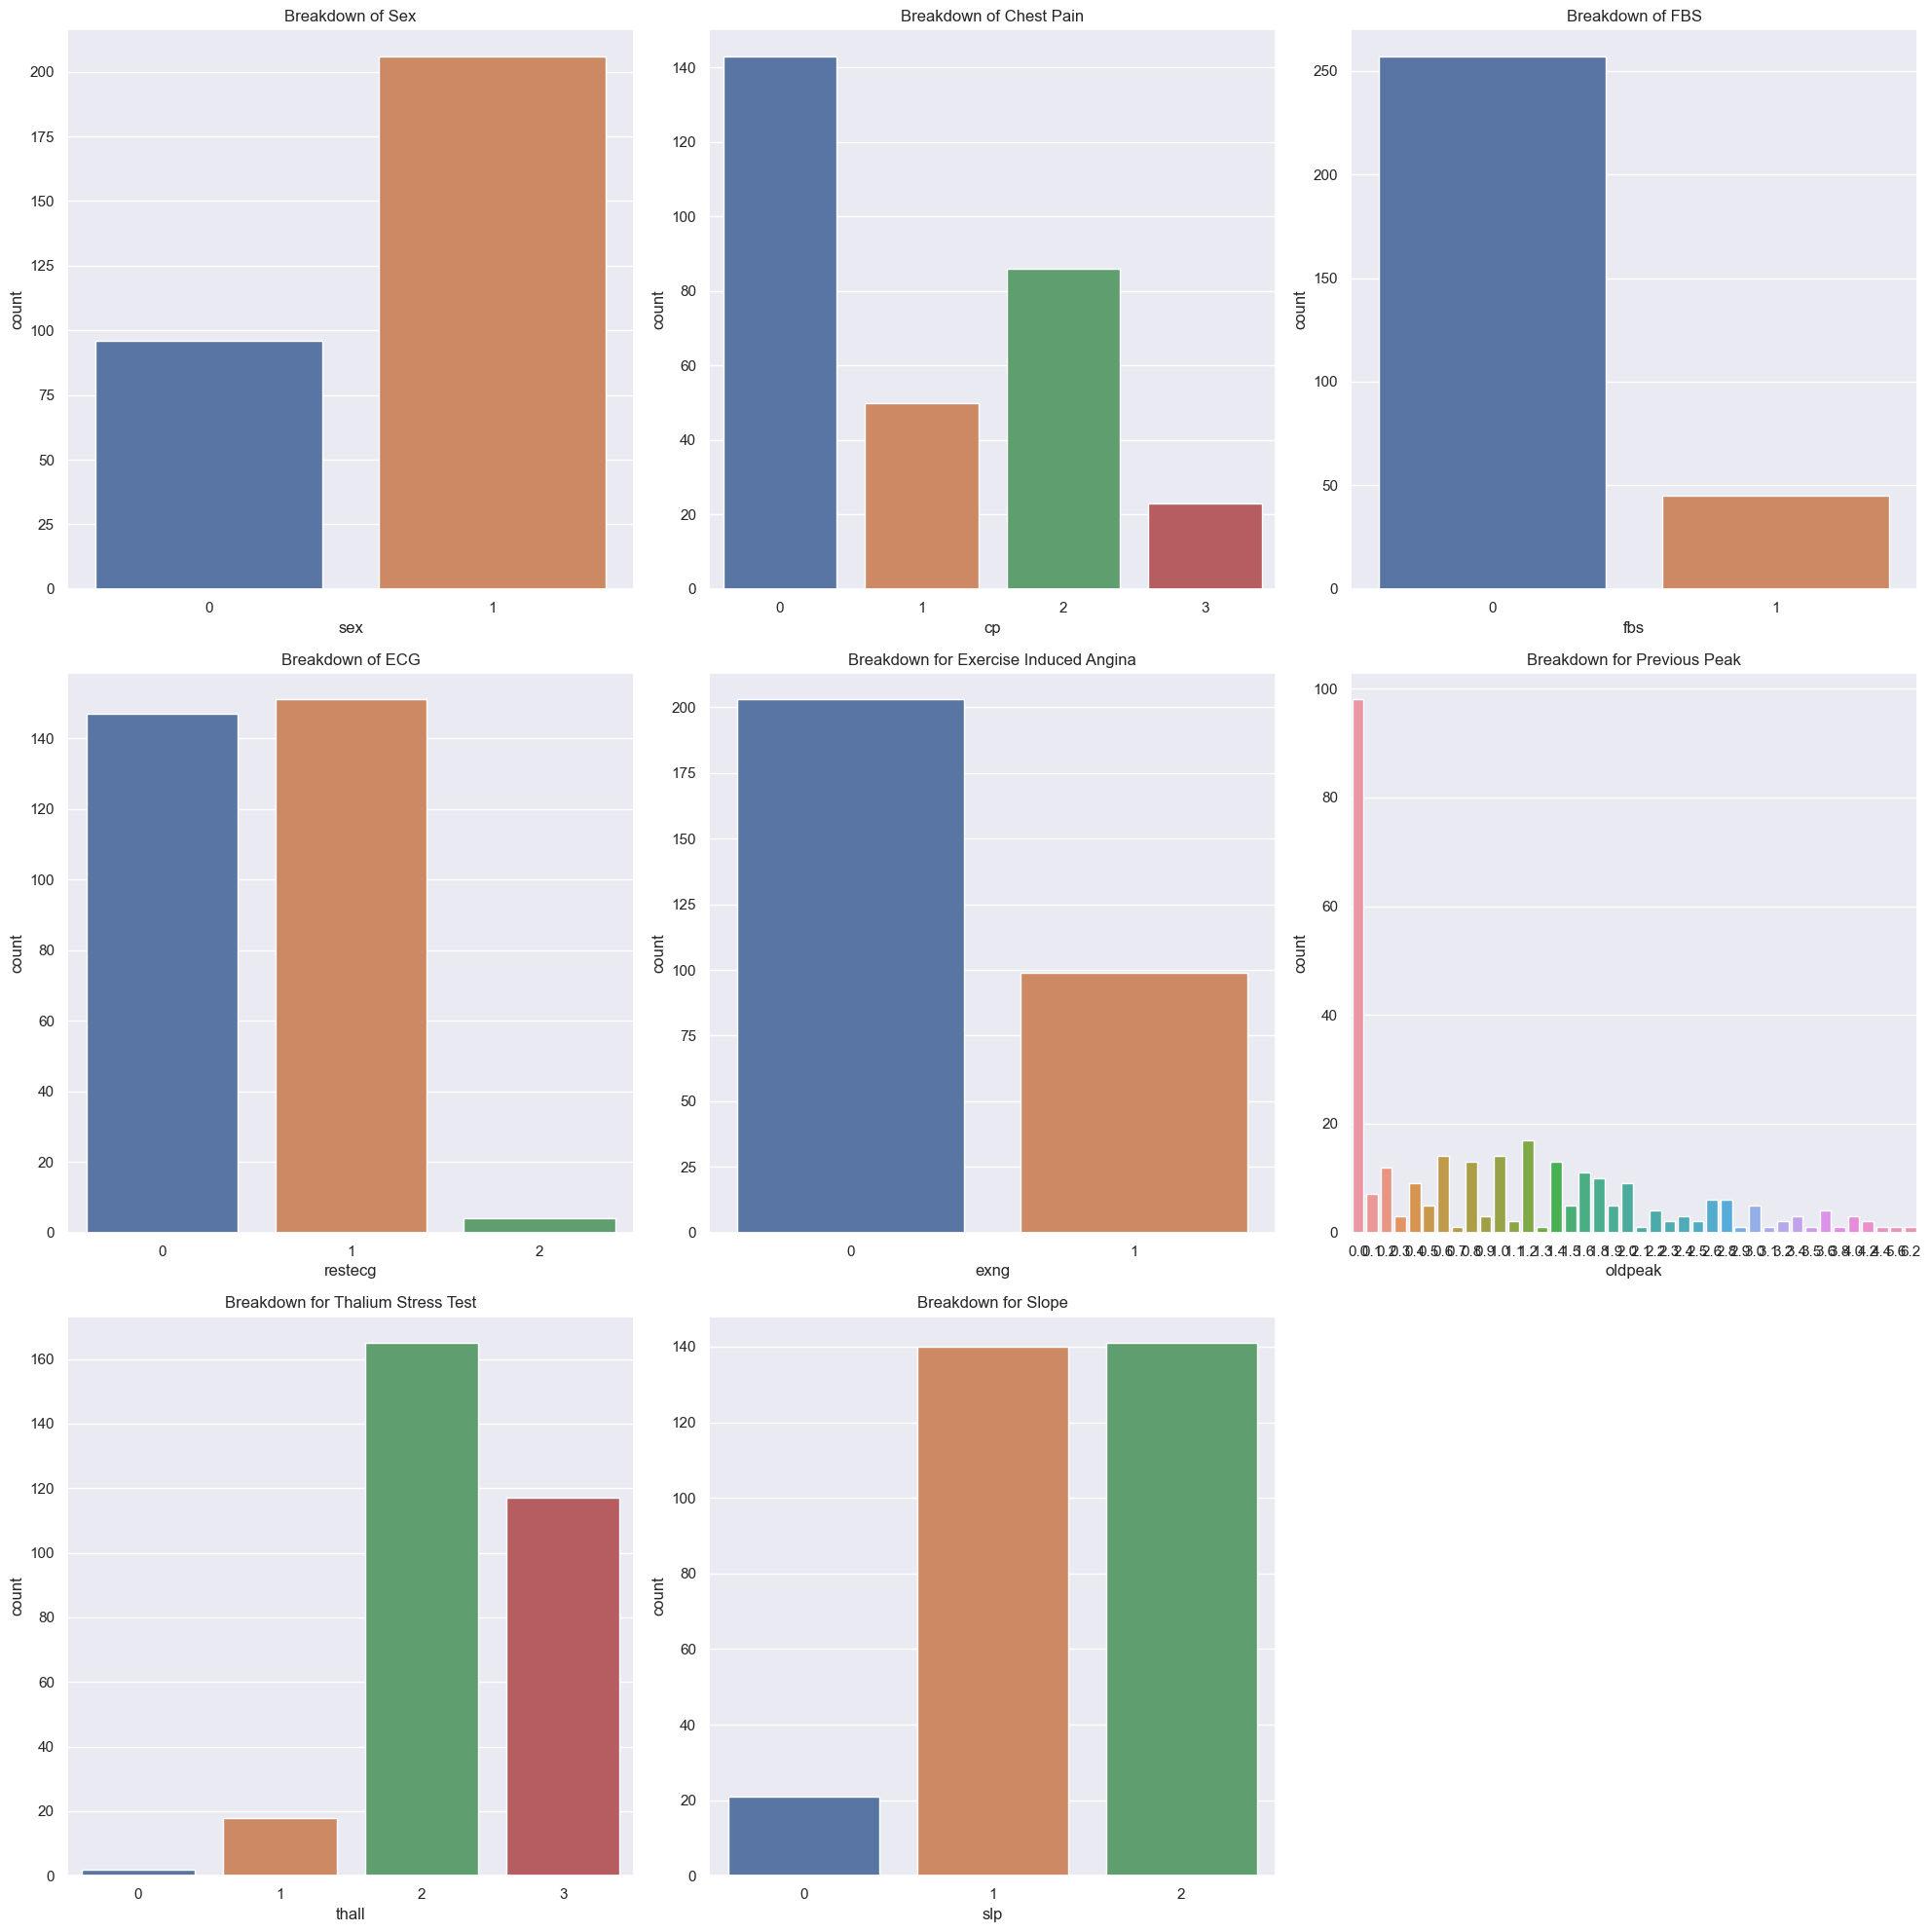

In [14]:
plt.figure(figsize=(20, 20))

# Breakdown of Sex
plt.subplot(3, 3, 1)
sb.countplot(data=heartData, x="sex")
plt.title("Breakdown of Sex")

# Breakdown of Chest Pain
plt.subplot(3, 3, 2)
sb.countplot(data=heartData, x="cp")
plt.title("Breakdown of Chest Pain")

# Breakdown of FBS
plt.subplot(3, 3, 3)
sb.countplot(data=heartData, x="fbs")
plt.title("Breakdown of FBS")

# Breakdown of ECG
plt.subplot(3, 3, 4)
sb.countplot(data=heartData, x="restecg")
plt.title("Breakdown of ECG")

# Breakdown for Exercise Induced Angina
plt.subplot(3, 3, 5)
sb.countplot(data=heartData, x="exng")
plt.title("Breakdown for Exercise Induced Angina")

# Breakdown for Previous Peak
plt.subplot(3, 3, 6)
sb.countplot(data=heartData, x="oldpeak")
plt.title("Breakdown for Previous Peak")

# Breakdown for Thalium Stress Test
plt.subplot(3, 3, 7)
sb.countplot(data=heartData, x="thall")
plt.title("Breakdown for Thalium Stress Test")

# Breakdown for Slope
plt.subplot(3, 3, 8)
sb.countplot(data=heartData, x="slp")
plt.title("Breakdown for Slope")


plt.tight_layout()
plt.show()

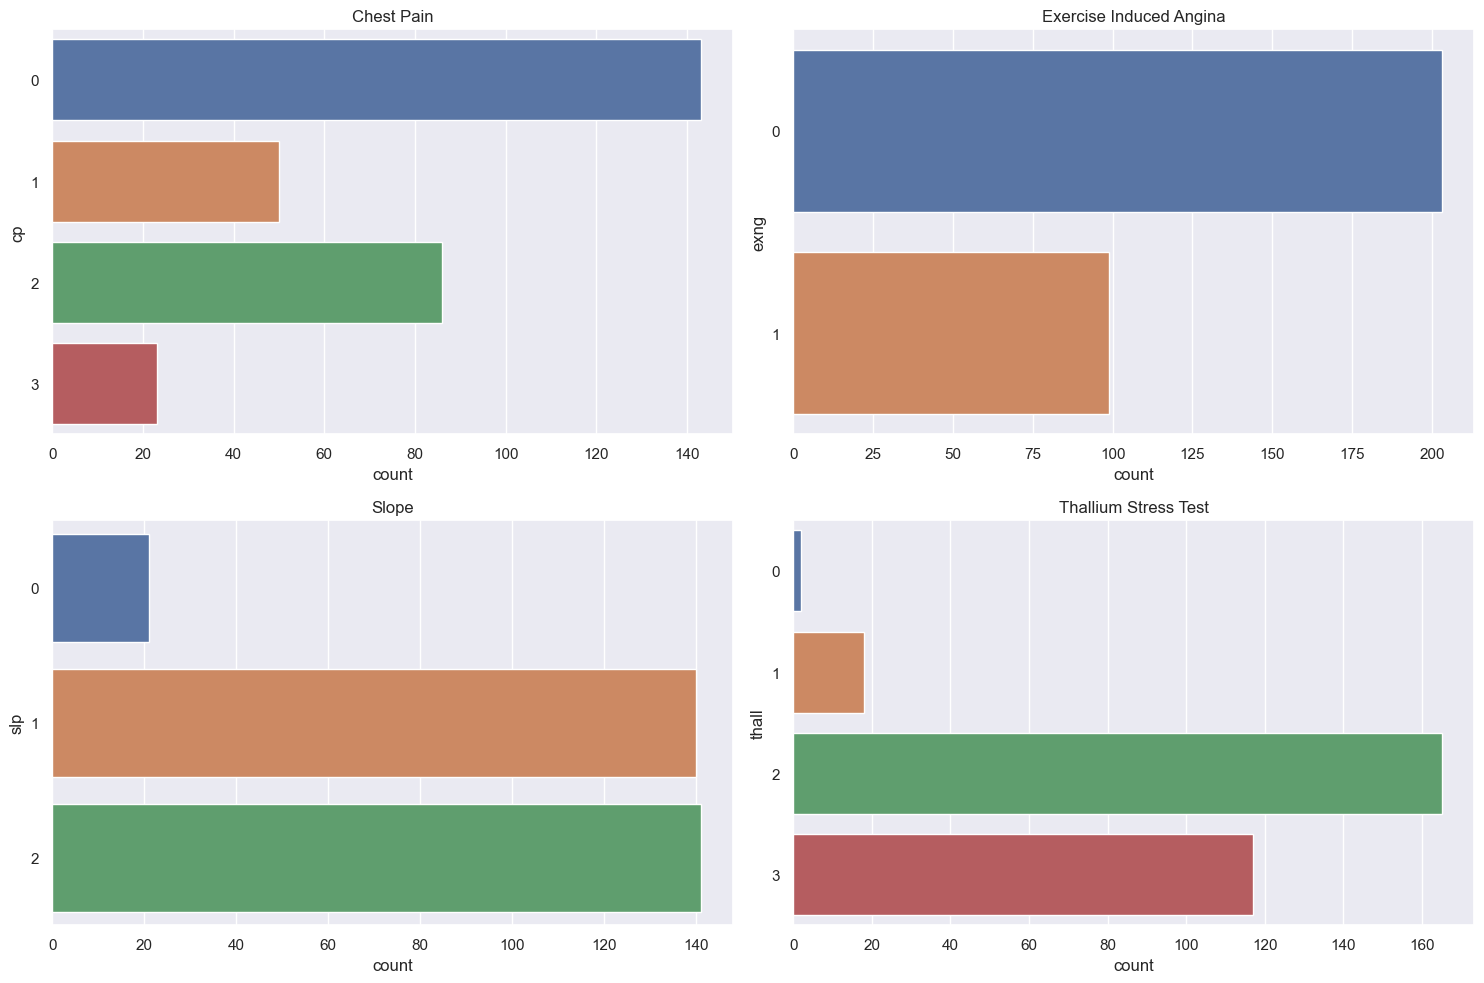

In [15]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sb.countplot(y="cp", data=catHeart)
plt.title("Chest Pain")

plt.subplot(2, 2, 2)
sb.countplot(y="exng", data=catHeart)
plt.title("Exercise Induced Angina")

plt.subplot(2, 2, 3)
sb.countplot(y="slp", data=catHeart)
plt.title("Slope")


plt.subplot(2, 2, 4)
sb.countplot(y="thall", data=catHeart)
plt.title("Thallium Stress Test")
plt.tight_layout()
plt.show()

In [16]:
catHeart["cp"].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
Number of people with chest pain of type 0 i.e 'Typical Angina' is the highest.
Number of people with chest pain of type 3 i.e 'Asymptomatic' is the lowest.
Number of people with people with chest pain of type 0 is almost 50% of all the people.

In [17]:
catHeart["exng"].value_counts()

0    203
1     99
Name: exng, dtype: int64

Exercise induced angina ~ 1 = Yes, 0 = No.
"No" Category is almost double the "Yes".

In [18]:
catHeart["slp"].value_counts()

2    141
1    140
0     21
Name: slp, dtype: int64

Slope 1 and 2 is almost equivalent and 7 times that of slope 0.

In [19]:
catHeart["thall"].value_counts()

2    165
3    117
1     18
0      2
Name: thall, dtype: int64

Thall count is max for type 2 and min/almost negligible for type 0.

<Axes: >

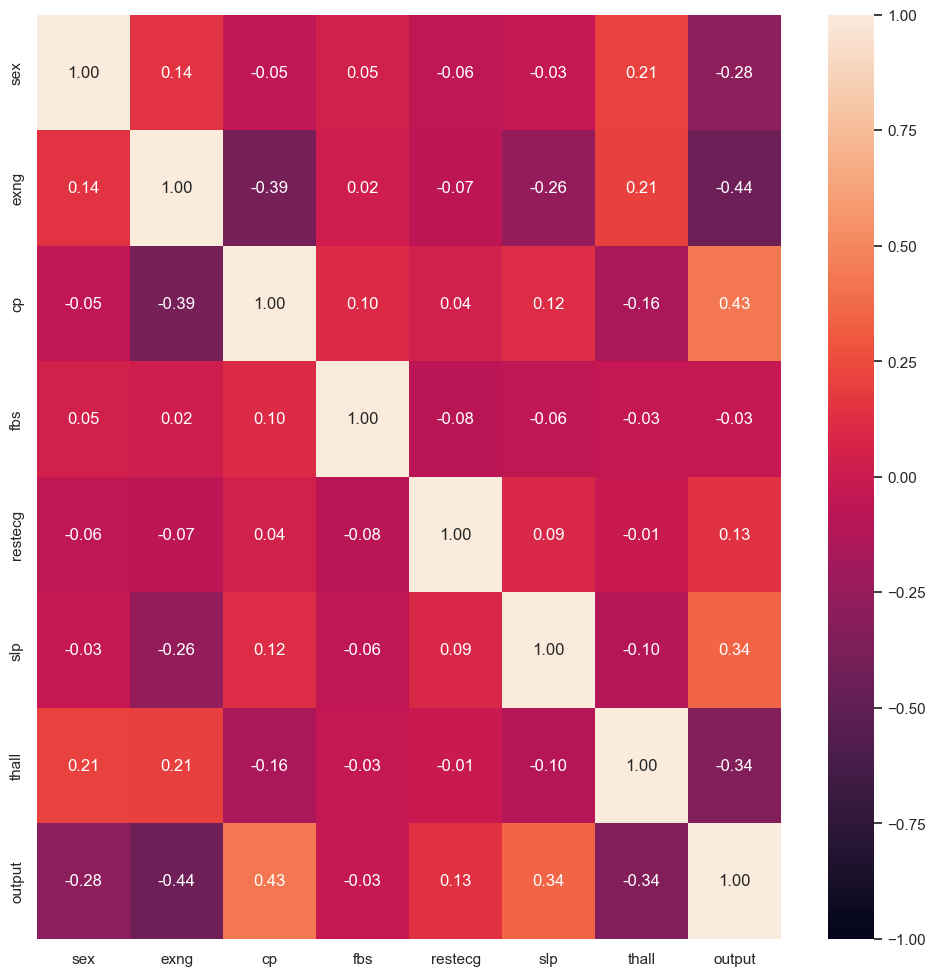

In [20]:
f = plt.figure(figsize=(12,12))
sb.heatmap(catHeart.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

# Numeric Visualisation

In [21]:
numHeart = heartData[["age","chol", "trtbps", "thalachh", "caa", "output"]]

In [22]:
numHeart.describe()

,age,chol,trtbps,thalachh,caa,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,246.500000,131.602649,149.569536,0.718543,0.543046
std,9.04797,51.753489,17.563394,22.903527,1.006748,0.498970
min,29.00000,126.000000,94.000000,71.000000,0.000000,0.000000
25%,48.00000,211.000000,120.000000,133.250000,0.000000,0.000000
50%,55.50000,240.500000,130.000000,152.500000,0.000000,1.000000
75%,61.00000,274.750000,140.000000,166.000000,1.000000,1.000000
max,77.00000,564.000000,200.000000,202.000000,4.000000,1.000000


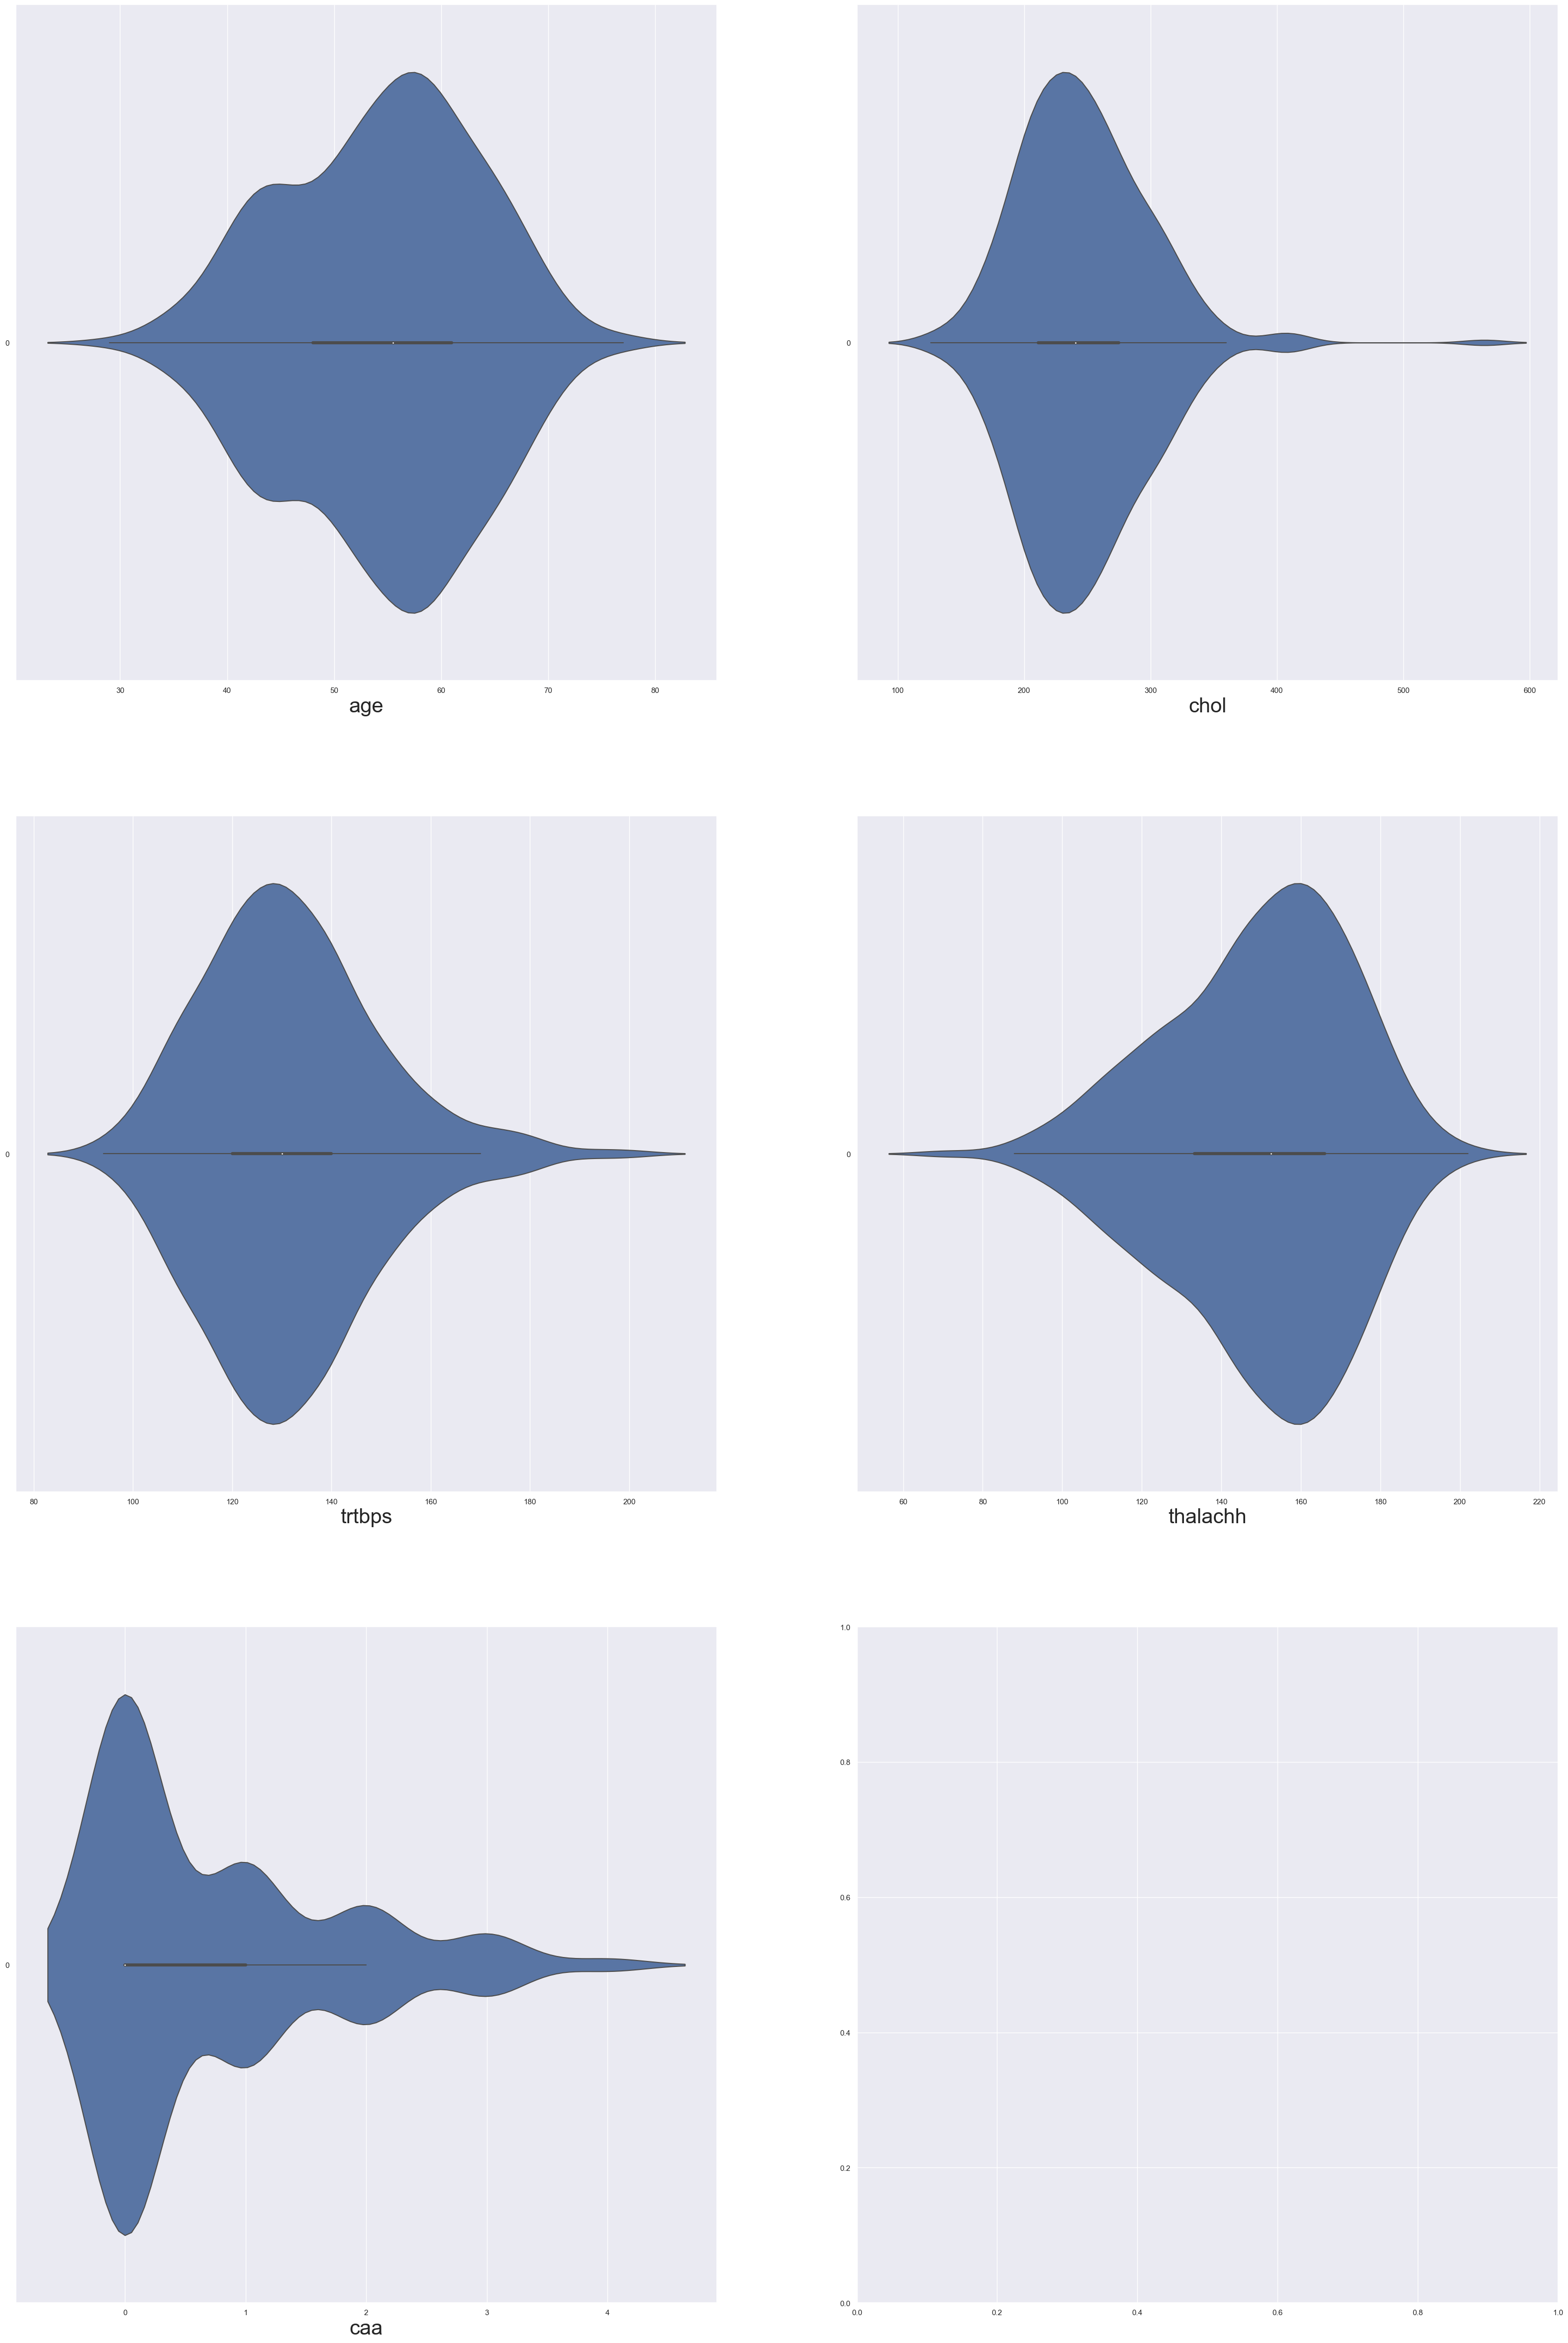

In [23]:
f, axes = plt.subplots(3,2,figsize=(40,60))
count = 0
row = 0
othernumHeart = [x for x in numHeart.columns if x != 'output']
for var in othernumHeart:
    if count % 2 == 0:
        col = 0
    else:
        col = 1
    sb.violinplot(data = numHeart[var], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize=30)
    count+=1
    if count %2 == 0:
        row+=1

Age and Resting Blood Pressure follow a normal distribution while Cholestrol is skewed to the left and Maximum Heart Rate Achieved is skewed to the right.

Now we look at the distribution of the Output as it is our target variable in determining the occurence of a heart attack.

In [24]:
heartData["output"].describe()

count    302.000000
mean       0.543046
std        0.498970
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: output, dtype: float64

<Axes: >

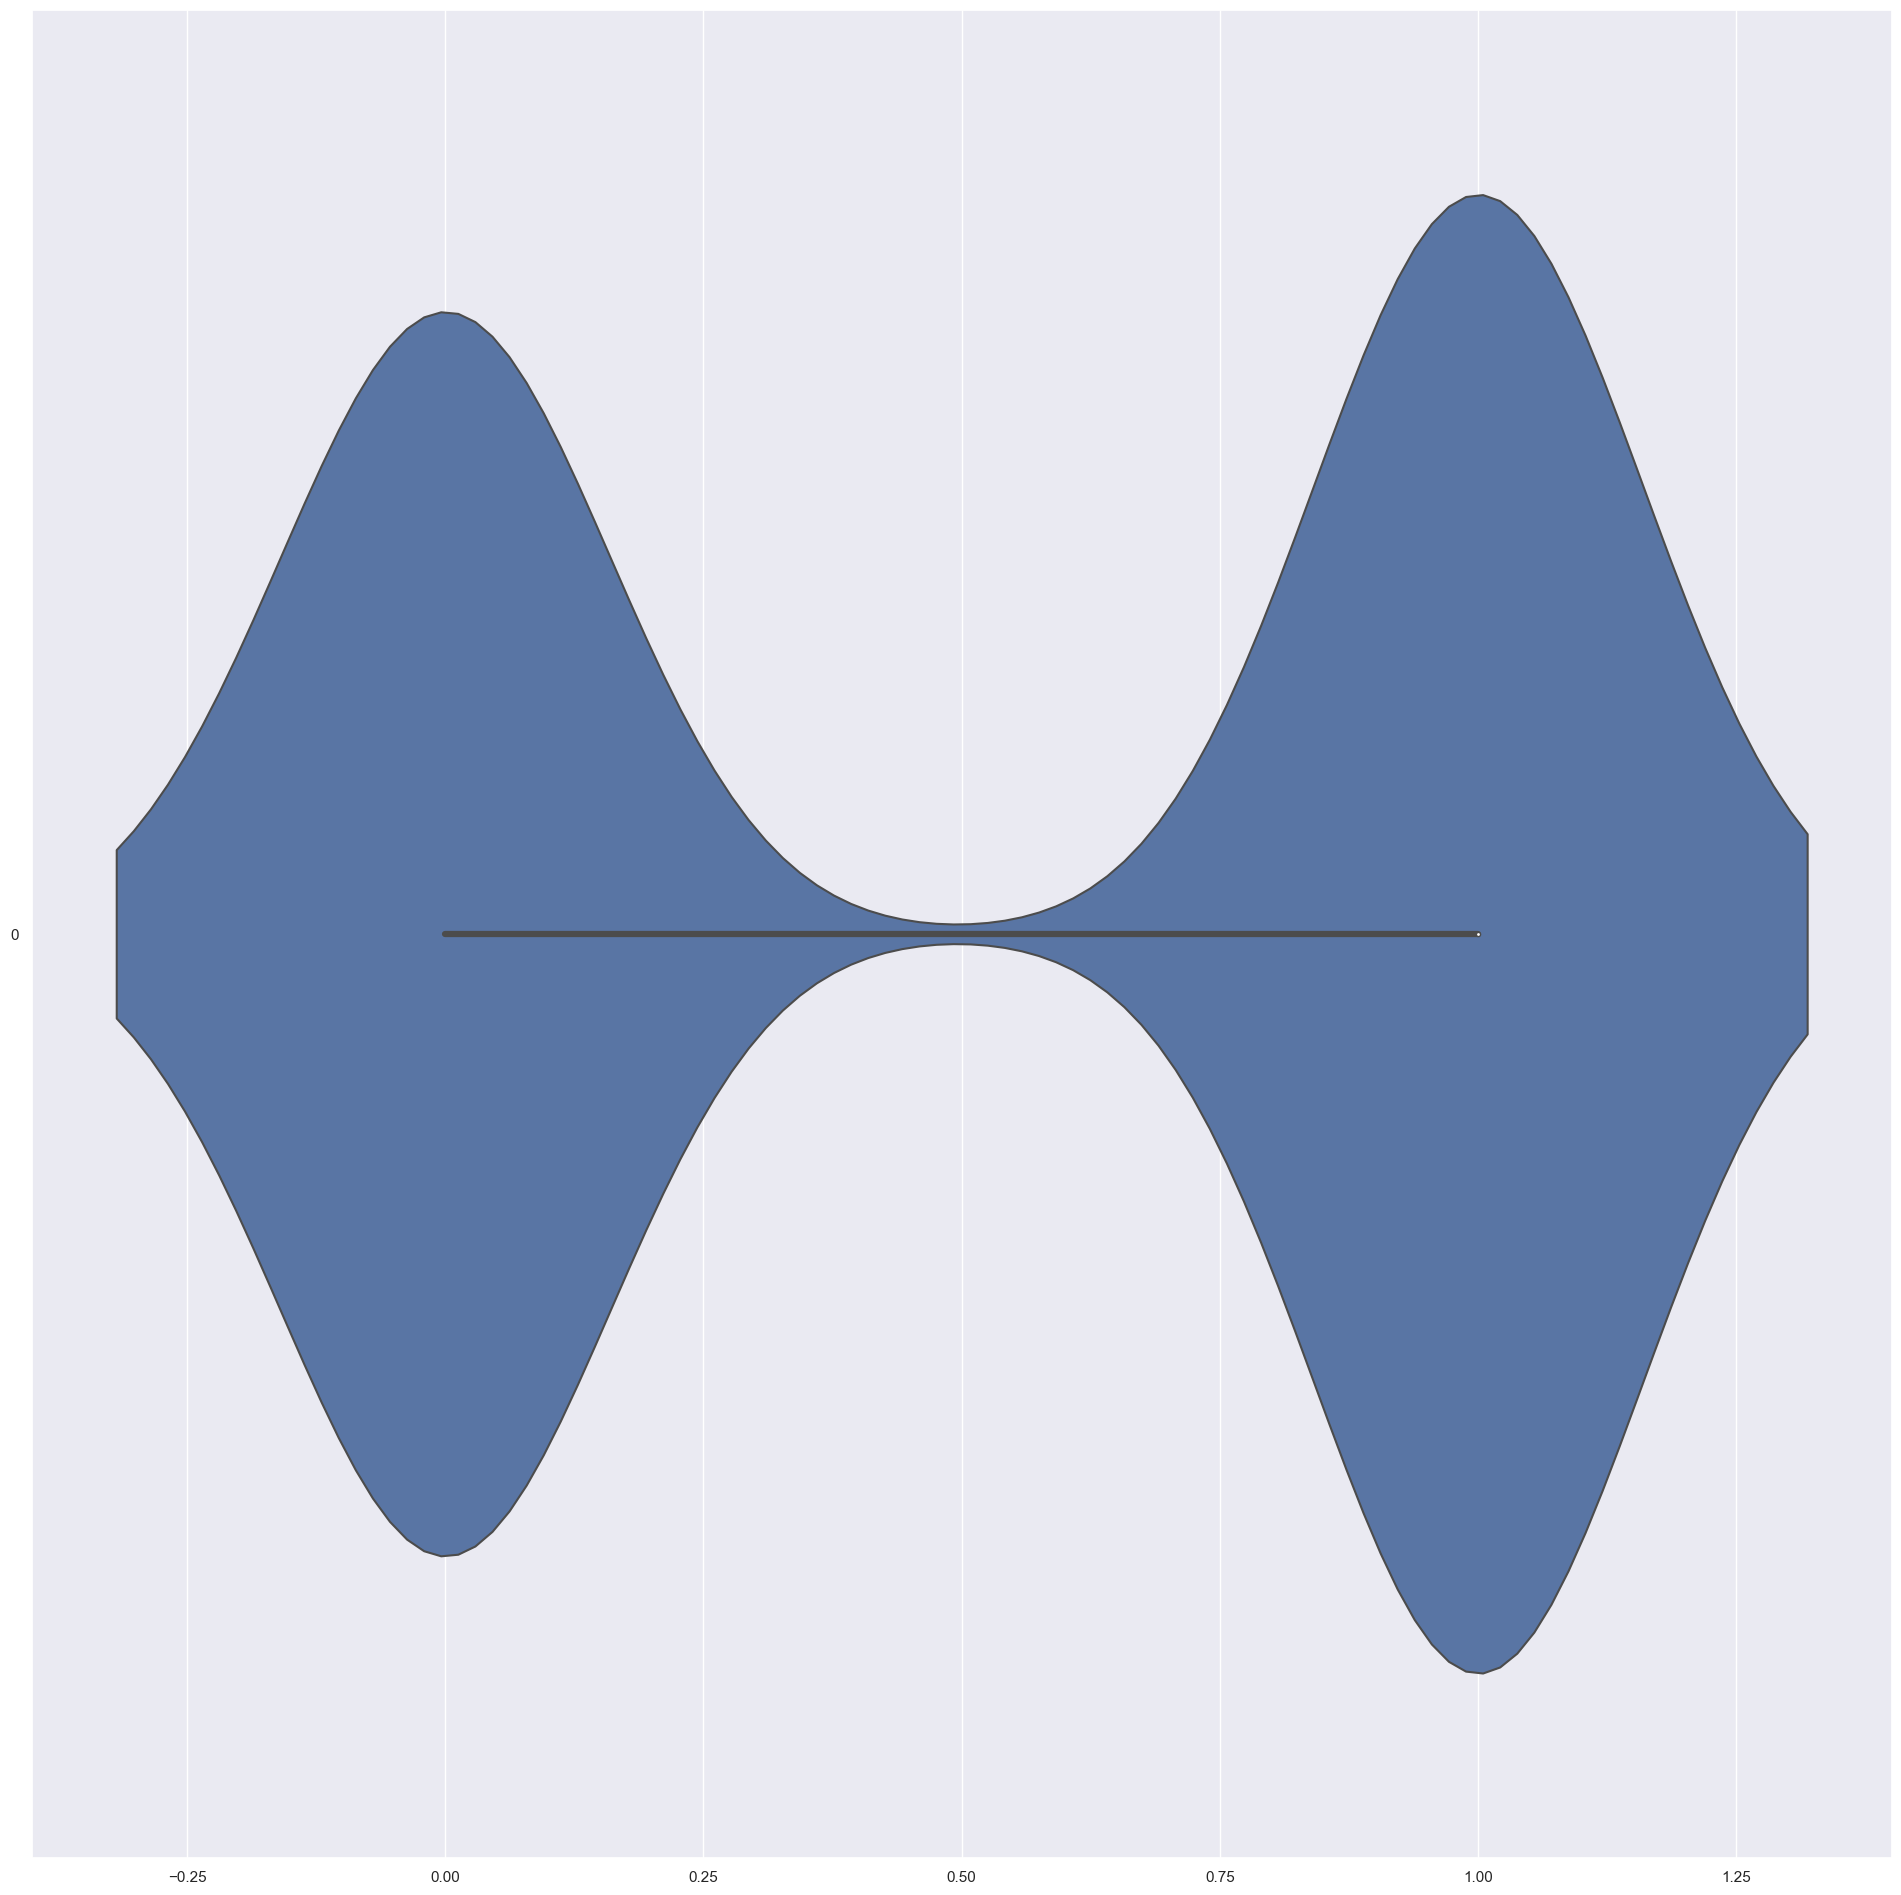

In [25]:
f = plt.subplots(1,figsize=(24, 24))
sb.violinplot(data = heartData["output"], orient = "h")

The occurence of a heart attack seems to be about equally distributed.

In [26]:
numHeart.corr()

,age,chol,trtbps,thalachh,caa,output
age,1.000000,0.207216,0.283121,-0.395235,0.302261,-0.221476
chol,0.207216,1.000000,0.125256,-0.005308,0.086878,-0.081437
trtbps,0.283121,0.125256,1.000000,-0.048023,0.099248,-0.146269
thalachh,-0.395235,-0.005308,-0.048023,1.000000,-0.228311,0.419955
caa,0.302261,0.086878,0.099248,-0.228311,1.000000,-0.408992
output,-0.221476,-0.081437,-0.146269,0.419955,-0.408992,1.000000


<Axes: >

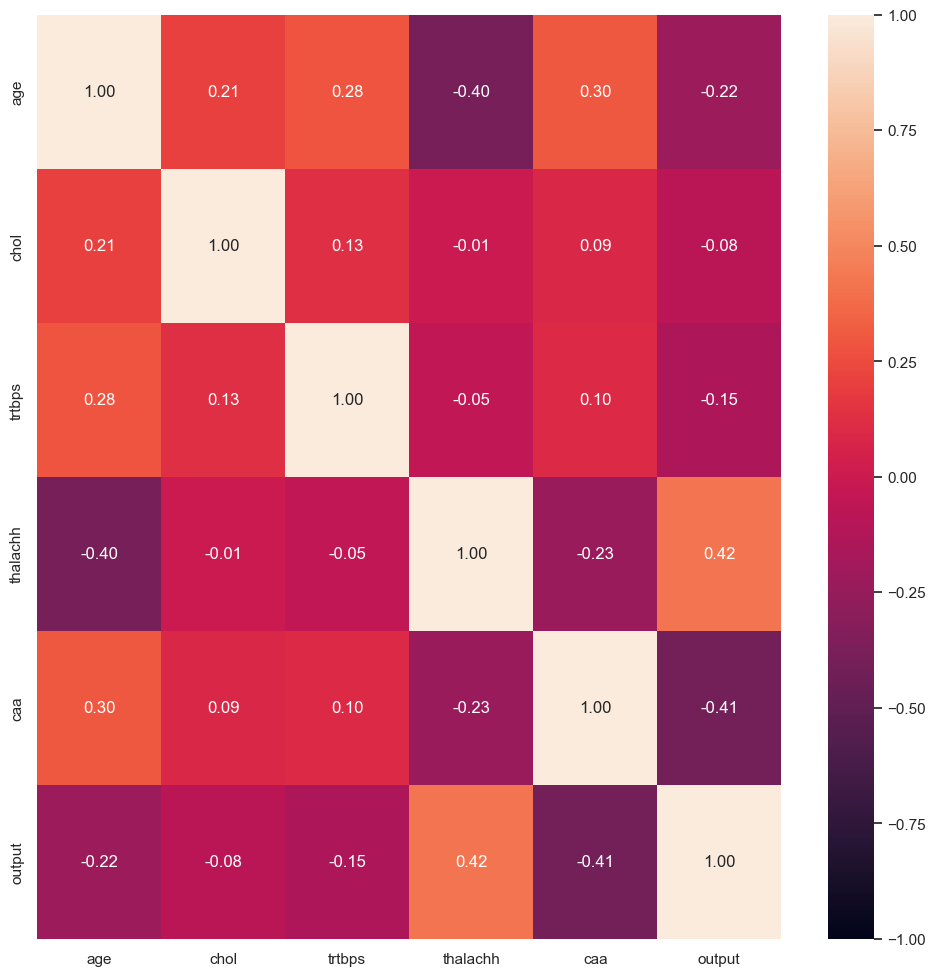

In [27]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12,12))
sb.heatmap(numHeart.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Maximum Heart Rate Achieved (thalachh) has the highest correlation with the occurence of a heart attack and hence is a good predictor.

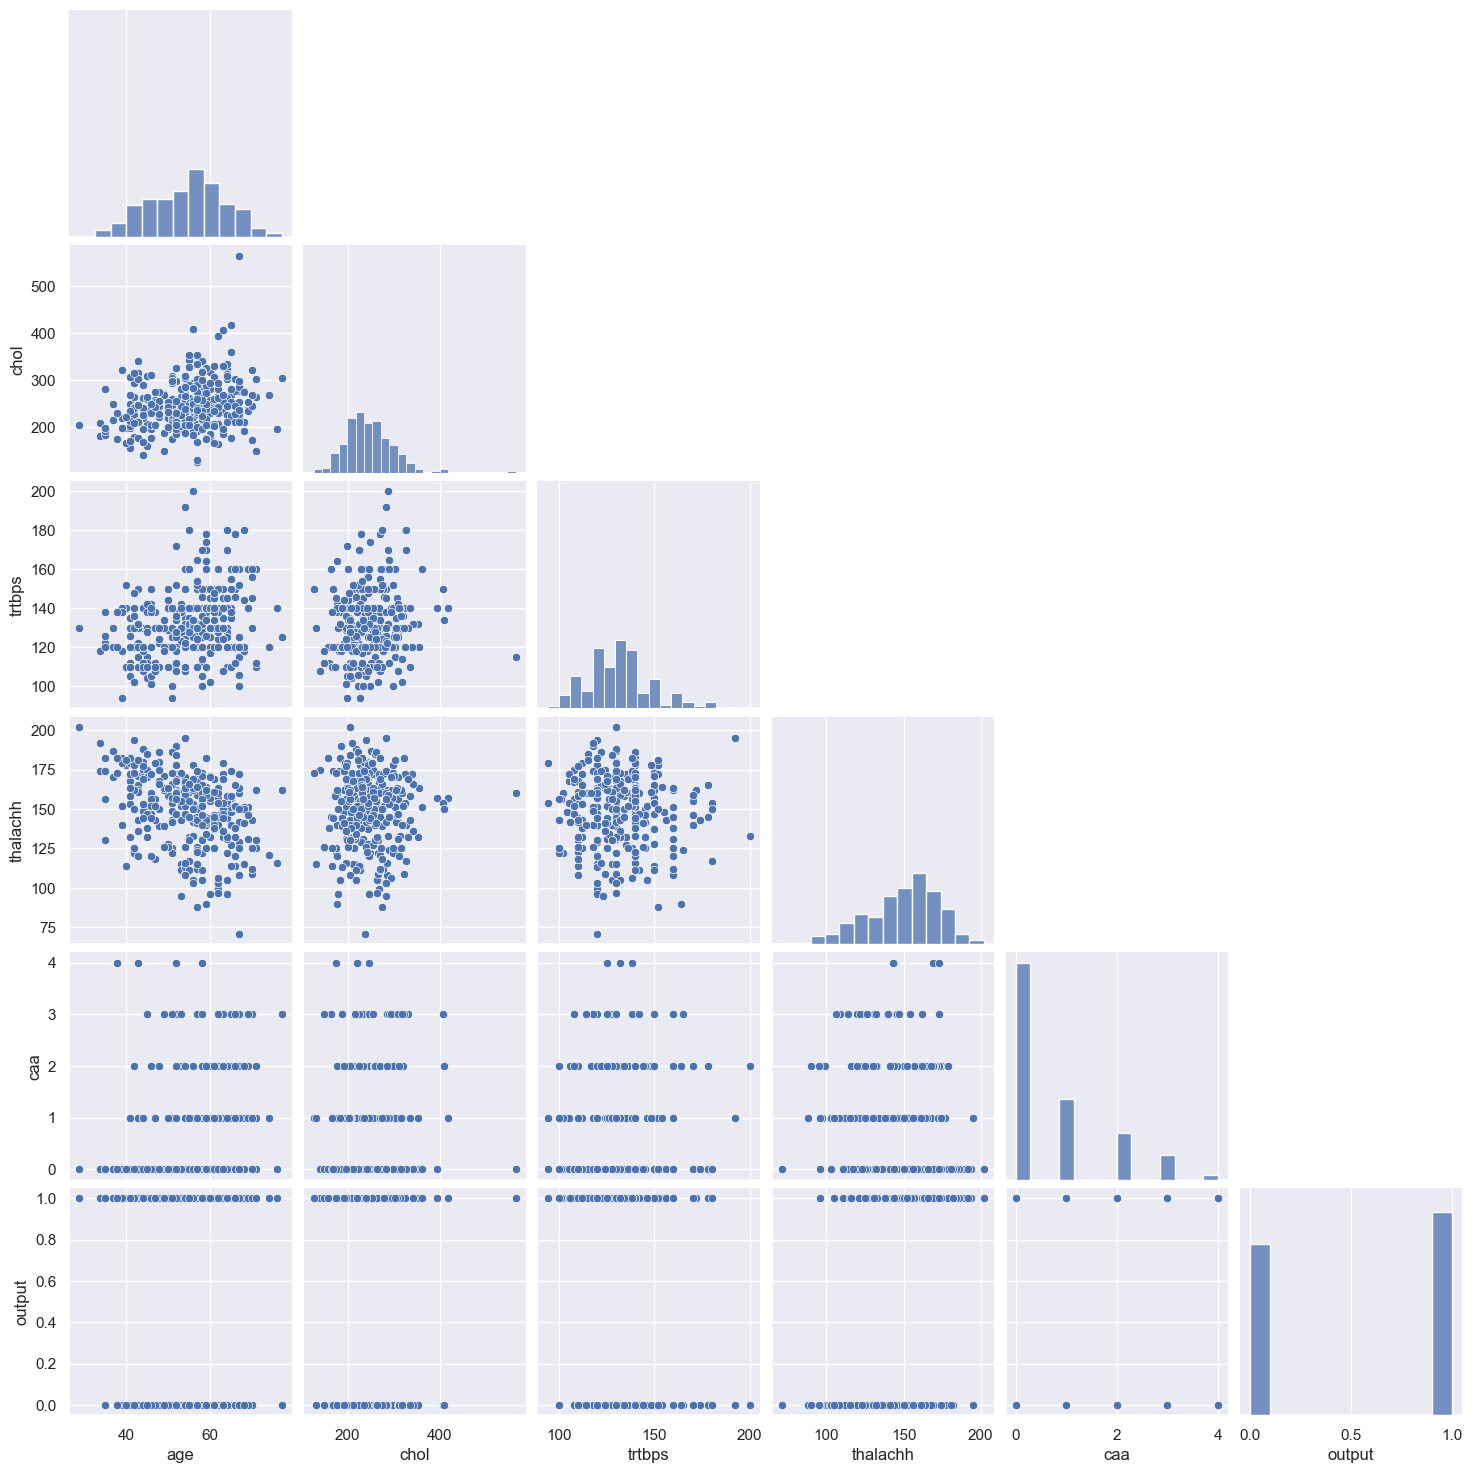

In [28]:
sb.pairplot(data = numHeart, corner = True)

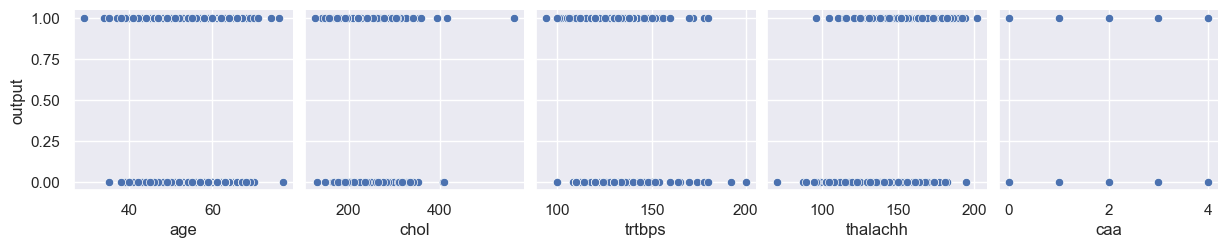

In [29]:
sb.pairplot(data=numHeart,
                  y_vars=['output'],
                  x_vars=["age","chol", "trtbps", "thalachh","caa"])


# Multivariate Exploration

<Figure size 2000x2000 with 0 Axes>

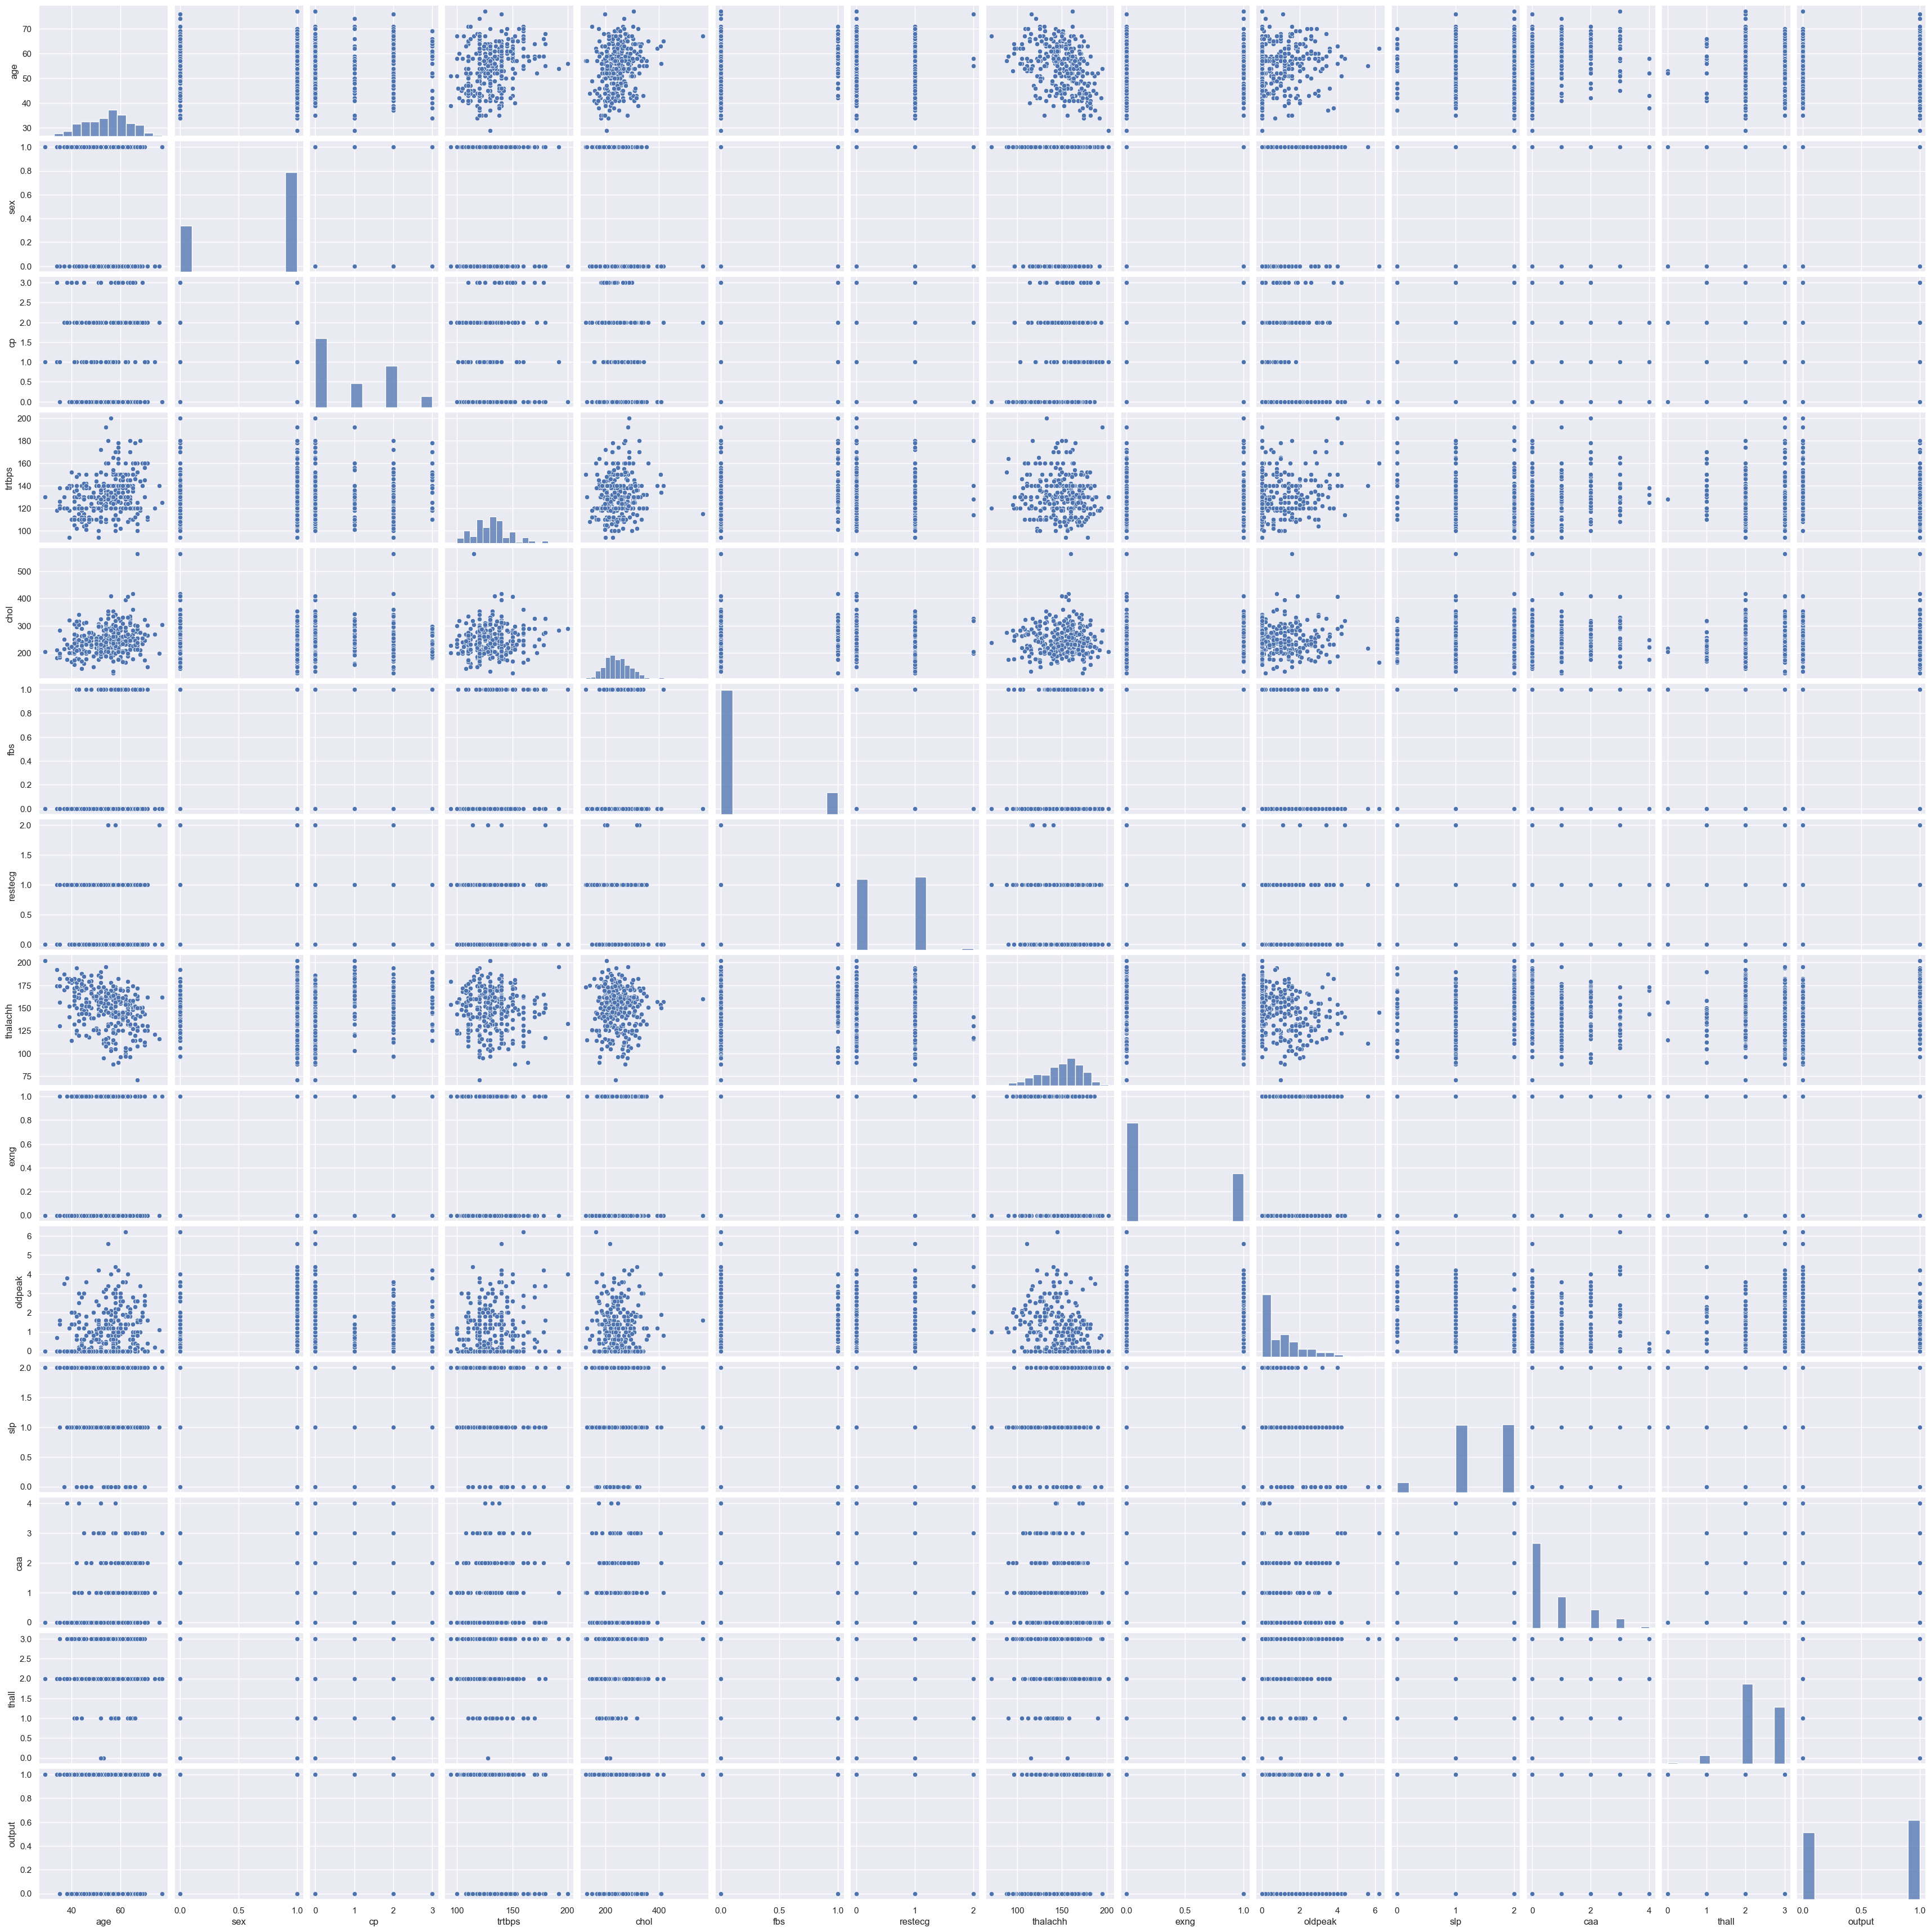

In [30]:
plt.figure(figsize=(20,20))
sb.pairplot(heartData)
plt.show()

# Final Observations

Through the correlation analysis of all the variabbles with the output variable, we realise that the exercise induced angina has the highest absolute value of correlation with the output variable, thereby implying that the exng is most useful in predicting the risk of heart attack according to the correlation matrix.

This is further proved with the help of the countplot that we created specifically under the categorical visualisation and it is clear through the countplot that the "No" category for exercise induced angina is almost double than the "Yes" category.

Through the correlation analysis of the numeric variables, it is shown that the thalium stress test result is the most contributing factor to the risk of heart attack.

Overall, here's the ranking from strongest to weakest association:

1. Exercise Induced Angina (exng): 0.435601 (moderate negative correlation)

2. Chest Pain Type (cp): 0.432080 (moderate positive correlation)

3. ST Depression Induced by Exercise Relative to Rest (oldpeak): 0.429146 (moderate negative correlation)

4. Number of Major Vessels (caa): 0.408992 (moderate negative correlation)

5. Maximum Heart Rate Achieved (thalachh): 0.419955 (moderate positive correlation)

6. Slope of the Peak Exercise ST Segment (slp): 0.343940 (moderate positive correlation)

7. Thal: 0.343101 (moderate negative correlation)

8. Age: 0.221476 (moderate negative correlation)

9. Sex: 0.283609 (moderate negative correlation)

10. Resting Electrocardiographic Results (restecg): 0.134874 (weak positive correlation)

11. Resting Blood Pressure (trtbps): 0.146269 (weak negative correlation)

12. Cholesterol (chol): 0.081437 (weak negative correlation)

13. Fasting Blood Sugar (fbs): 0.026826 (very weak negative correlation)

# Logistic Regression for Feature Selection

In order to further enhance the selcetion of data that we wanted to put into our machine learning model, we dedcided to do feature selection through logistic regression model.

Feature selection is the process of isolating the most consistent, non-redundant, and relevant features to use in model construction. Methodically reducing the size of datasets is important as the size and variety of datasets continue to grow.

Feature selection is crucial as it enhances model performance by reducing overfitting and computational complexity, improves interpretability by focusing on the most relevant features, mitigates multicollinearity, and enables faster model training and inference. By selecting the most informative features, models become more interpretable, computationally efficient, and generalizable to unseen data, making them valuable for decision-making and regulatory compliance in various domains.

In [31]:
X = heartData.drop(columns=['output'])
y = heartData['output']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluate Logistic Regression model
logistic_preds = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_preds)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_preds))

# Get coefficients and feature names
coefficients = logistic_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display coefficients and feature names
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

print("Feature Importance using Logistic Regression:")
print(feature_importance)

# Sort feature importance DataFrame by absolute coefficient values
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)


Logistic Regression Accuracy: 0.8524590163934426
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Feature Importance using Logistic Regression:
     Feature  Coefficient
1        sex    -1.172798
12     thall    -1.142387
11       caa    -0.769140
8       exng    -0.730590
2         cp     0.696413
10       slp     0.656893
6    restecg     0.546694
9    oldpeak    -0.480931
5        fbs     0.076861
7   thalachh     0.033457
3     trtbps    -0.021249
0        age     0.020281
4       chol    -0.002199


/Users/pandeymahi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Machine Learning - Random Forest Classifier

In [32]:
# Split data into features (X) and target variable (y)
X = heartData.drop(columns=['output'])
y = heartData['output']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Initialize and train Random Forest model using all 12 variables
rf_model_all = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_all.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Evaluate Random Forest model using all 13 variables
rf_preds_all = rf_model_all.predict(X_test)
rf_accuracy_all = accuracy_score(y_test, rf_preds_all)
print("Random Forest Accuracy (All variables):", rf_accuracy_all)
print("Random Forest Classification Report (All variables):")
print(classification_report(y_test, rf_preds_all))

Random Forest Accuracy (All variables): 0.8688524590163934
Random Forest Classification Report (All variables):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



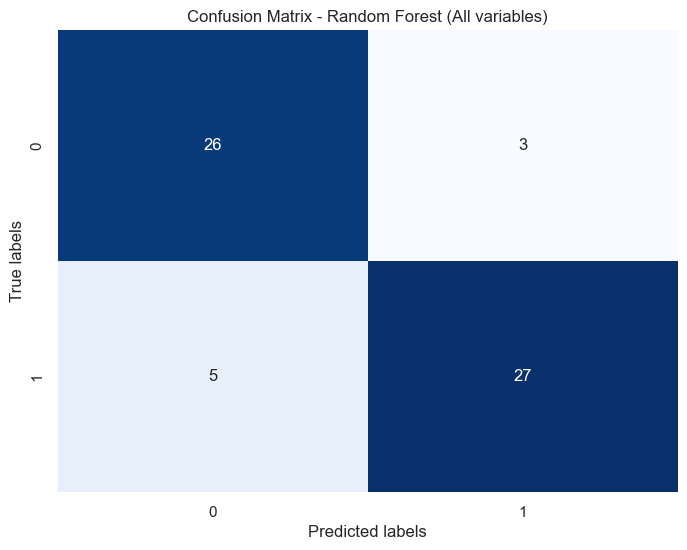

In [35]:
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test, rf_preds_all), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest (All variables)')
plt.show()

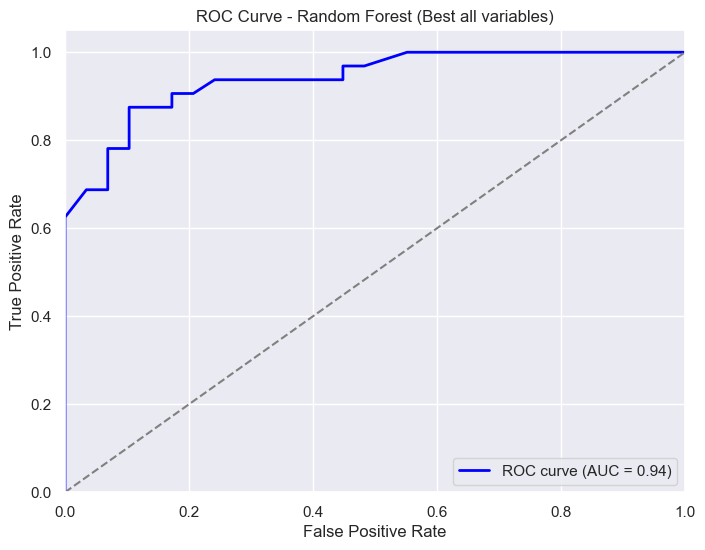

In [52]:
# Get the predicted probabilities for the positive class
rf_probs_all = rf_model_all.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probs_all)

# Compute the area under the ROC curve (AUC)
auc_rf = roc_auc_score(y_test, rf_probs_all)

# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Best all variables)')
plt.legend(loc='lower right')
plt.show()

In [37]:
# Define the best 8 features based on logistic regression feature importance
best_8_features = ['sex', 'thall', 'caa', 'exng', 'cp', 'slp', 'restecg', 'oldpeak']

X_best_8 = heartData[best_8_features]

In [38]:
# Split data into training and testing sets
X_train_best_8, X_test_best_8, y_train_best_8, y_test_best_8 = train_test_split(X_best_8, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model using best 8 variables
rf_model_best_8 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_best_8.fit(X_train_best_8, y_train_best_8)

# Evaluate Random Forest model using best 8 variables
rf_preds_best_8 = rf_model_best_8.predict(X_test_best_8)
rf_accuracy_best_8 = accuracy_score(y_test_best_8, rf_preds_best_8)
print("\nRandom Forest Accuracy (Best 8 variables):", rf_accuracy_best_8)
print("Random Forest Classification Report (Best 8 variables):")
print(classification_report(y_test_best_8, rf_preds_best_8))



Random Forest Accuracy (Best 8 variables): 0.8524590163934426
Random Forest Classification Report (Best 8 variables):
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



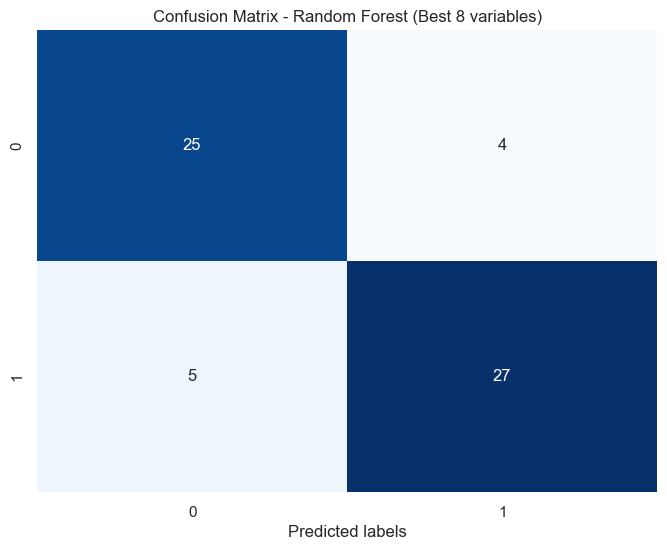

In [39]:
# Confusion Matrix for Random Forest (Best 8 variables)
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test_best_8, rf_preds_best_8), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.title('Confusion Matrix - Random Forest (Best 8 variables)')
plt.show()

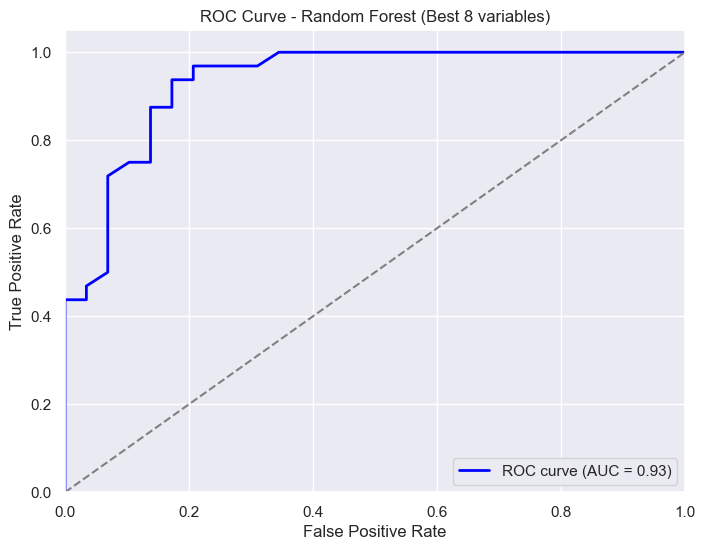

In [51]:
# Get the predicted probabilities for the positive class
rf_probs_best_8 = rf_model_best_8.predict_proba(X_test[best_8_features])[:, 1]

# Compute the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probs_best_8)

# Compute the area under the ROC curve (AUC)
auc_rf = roc_auc_score(y_test, rf_probs_best_8)

# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Best 8 variables)')
plt.legend(loc='lower right')
plt.show()

In [41]:
# Selecting the best 3 variables based on correlation
best_3_features = ['sex', 'thall', 'caa']
X_best_3 = heartData[best_3_features]

# Split data into training and testing sets
X_train_best_3, X_test_best_3, y_train_best_3, y_test_best_3 = train_test_split(X_best_3, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model using best 3 variables
rf_model_best_3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_best_3.fit(X_train_best_3, y_train_best_3)

# Evaluate Random Forest model using best 3 variables
rf_preds_best_3 = rf_model_best_3.predict(X_test_best_3)
rf_accuracy_best_3 = accuracy_score(y_test_best_3, rf_preds_best_3)
print("\nRandom Forest Accuracy (Best 3 variables):", rf_accuracy_best_3)
print("Random Forest Classification Report (Best 3 variables):")
print(classification_report(y_test_best_3, rf_preds_best_3))


Random Forest Accuracy (Best 3 variables): 0.819672131147541
Random Forest Classification Report (Best 3 variables):
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



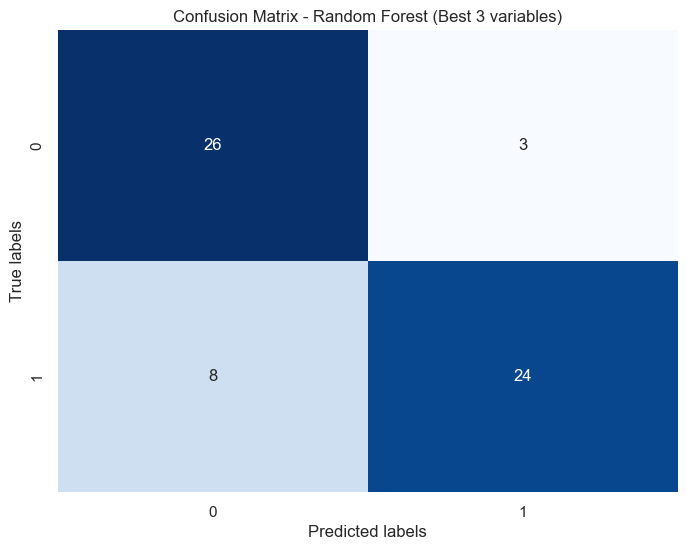

In [42]:
# Confusion Matrix for Random Forest (Best 3 variables)
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test_best_3, rf_preds_best_3), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest (Best 3 variables)')
plt.show()

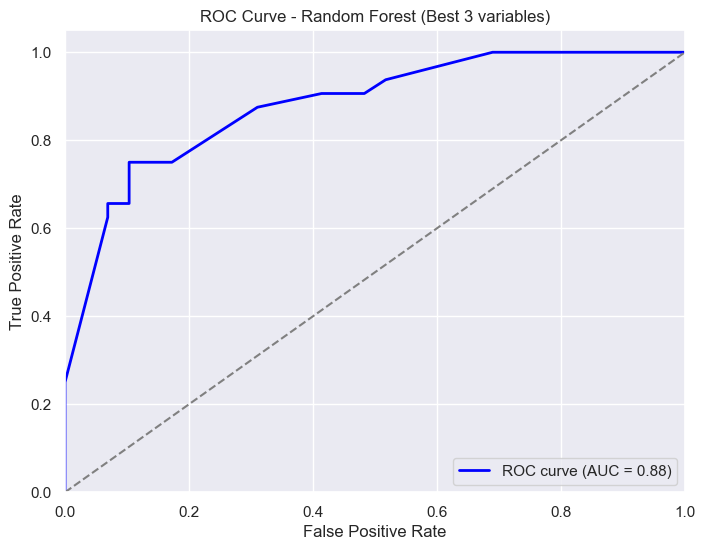

In [50]:
# Get the predicted probabilities for the positive class
rf_probs_best_3 = rf_model_best_3.predict_proba(X_test[best_3_features])[:, 1]

# Compute the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probs_best_3)

# Compute the area under the ROC curve (AUC)
auc_rf = roc_auc_score(y_test, rf_probs_best_3)

# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Best 3 variables)')
plt.legend(loc='lower right')
plt.show()

# Machine Learning - Gradient Boosting


Gradient Boosting Accuracy (All variables): 0.8524590163934426
Gradient Boosting Classification Report (All variables):
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



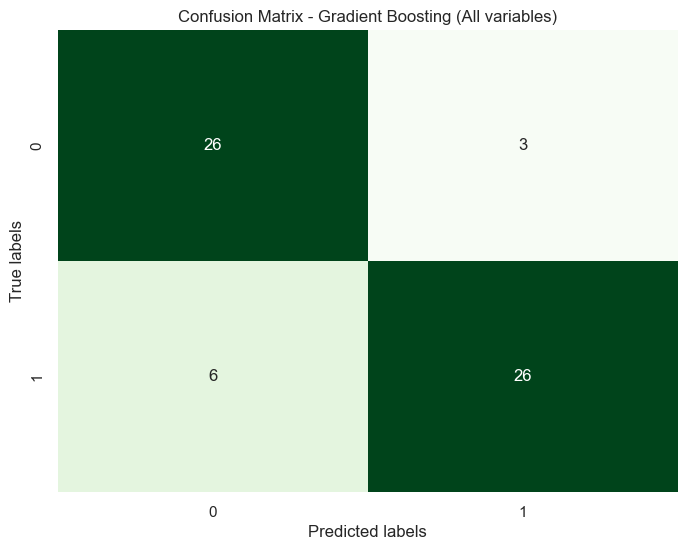

In [44]:
# Initialize and train Gradient Boosting model using all 13 variables
gb_model_all = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model_all.fit(X_train, y_train)

# Evaluate Gradient Boosting model using all 12 variables
gb_preds_all = gb_model_all.predict(X_test)
gb_accuracy_all = accuracy_score(y_test, gb_preds_all)
print("\nGradient Boosting Accuracy (All variables):", gb_accuracy_all)
print("Gradient Boosting Classification Report (All variables):")
print(classification_report(y_test, gb_preds_all))

# Confusion Matrix for Gradient Boosting (All variables)
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test, gb_preds_all), annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Gradient Boosting (All variables)')
plt.show()

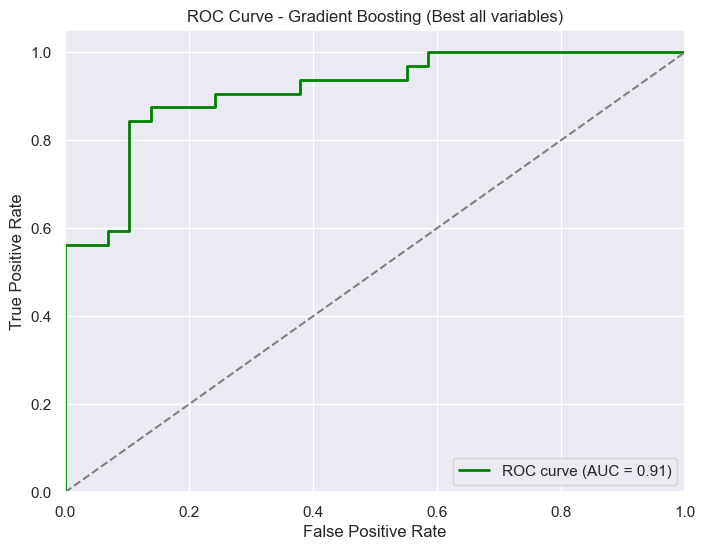

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
gb_probs_all = gb_model_all.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_probs_all)

# Compute the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, gb_probs_all)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting (Best all variables)')
plt.legend(loc='lower right')
plt.show()



Gradient Boosting Accuracy (Best 8 variables): 0.8360655737704918
Gradient Boosting Classification Report (Best 8 variables):
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



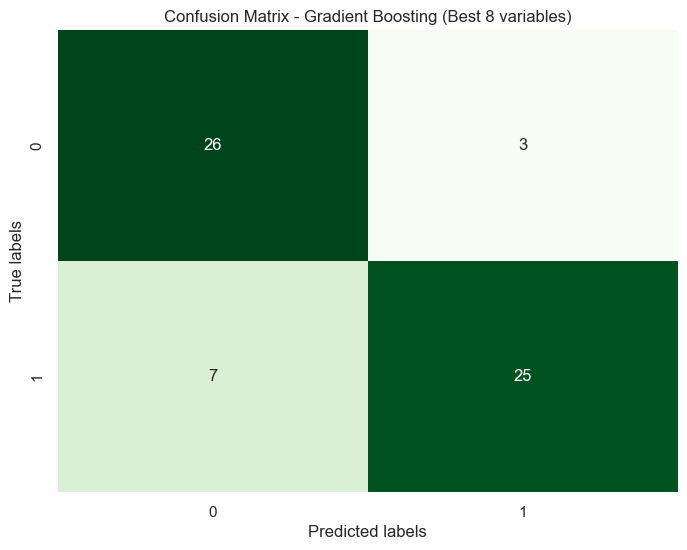

In [46]:
# Initialize and train Gradient Boosting model using best 8 variables
gb_model_best_8 = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model using the best 8 features
gb_model_best_8.fit(X_train[best_8_features], y_train)

# Evaluate Gradient Boosting model using best 8 variables
gb_preds_best_8 = gb_model_best_8.predict(X_test[best_8_features])
gb_accuracy_best_8 = accuracy_score(y_test, gb_preds_best_8)
print("\nGradient Boosting Accuracy (Best 8 variables):", gb_accuracy_best_8)
print("Gradient Boosting Classification Report (Best 8 variables):")
print(classification_report(y_test, gb_preds_best_8))

# Confusion Matrix for Gradient Boosting (Best 8 variables)
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test, gb_preds_best_8), annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Gradient Boosting (Best 8 variables)')
plt.show()


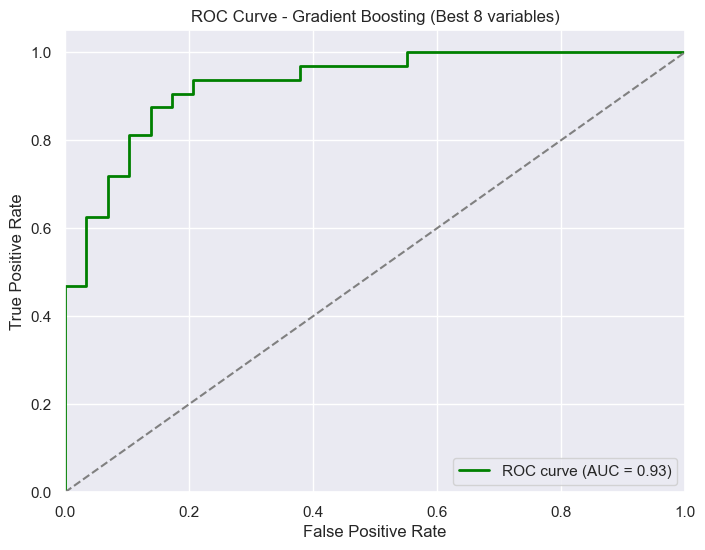

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
gb_probs_best_8 = gb_model_best_8.predict_proba(X_test[best_8_features])[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_probs_best_8)

# Compute the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, gb_probs_best_8)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting (Best 8 variables)')
plt.legend(loc='lower right')
plt.show()



Gradient Boosting Accuracy (Best 3 variables): 0.819672131147541
Gradient Boosting Classification Report (Best 3 variables):
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



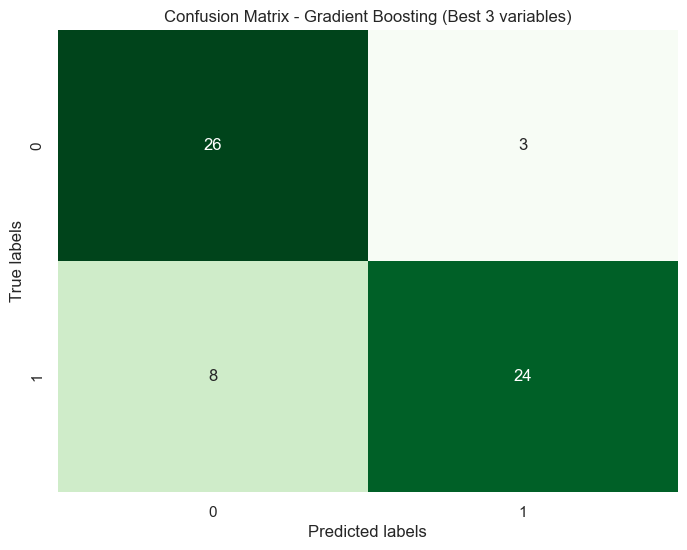

In [48]:
# Initialize and train Gradient Boosting model using best 3 variables
gb_model_best_3 = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model using the best 3 features
gb_model_best_3.fit(X_train[best_3_features], y_train)

# Evaluate Gradient Boosting model using best 3 variables
gb_preds_best_3 = gb_model_best_3.predict(X_test[best_3_features])
gb_accuracy_best_3 = accuracy_score(y_test, gb_preds_best_3)
print("\nGradient Boosting Accuracy (Best 3 variables):", gb_accuracy_best_3)
print("Gradient Boosting Classification Report (Best 3 variables):")
print(classification_report(y_test, gb_preds_best_3))

# Confusion Matrix for Gradient Boosting (Best 3 variables)
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test, gb_preds_best_3), annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Gradient Boosting (Best 3 variables)')
plt.show()


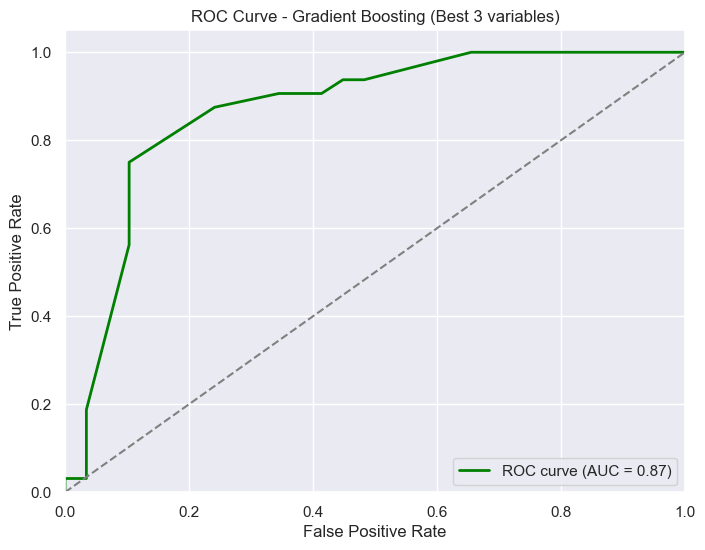

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
gb_probs_best_3 = gb_model_best_3.predict_proba(X_test[best_3_features])[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_probs_best_3)

# Compute the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, gb_probs_best_3)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting (Best 3 variables)')
plt.legend(loc='lower right')
plt.show()


# Final Conclusion

From the correlation analysis, we have realsied that the factors with the highest correlation are the "thalachh" and the "exng" variables.

But in order to get the best results, we have deicded to perform feature selection which gives us the features which are actualy the most influential, most consistent and non - redundant in predicting the risk of heart attack.

*Sex (sex)*: This feature has the highest negative coefficient, indicating that being male (coded as 1) decreases the likelihood of a heart attack. It has a coefficient of approximately -1.172798.

*Thallium Stress Test Result (thall)*: A lower thallium stress test result is associated with a higher risk of a heart attack, as indicated by the negative coefficient. It has a coefficient of approximately -1.142387.

*Number of Major Vessels Colored by Fluoroscopy (caa)*: The presence of more major vessels colored by fluoroscopy indicates a lower risk of a heart attack. It has a negative coefficient of approximately -0.769140.

*Exercise Induced Angina (exng)*: Presence of exercise-induced angina lowers the likelihood of a heart attack. It has a negative coefficient of approximately -0.730590.

*Chest Pain Type (cp)*: The type of chest pain is positively associated with the risk of a heart attack. It has a positive coefficient of approximately 0.696413.

*Slope (slp)*: A higher slope of the peak exercise ST segment is associated with a higher risk of a heart attack. It has a positive coefficient of approximately 0.656893.

*Resting Electrocardiographic Results (restecg)*: Certain resting electrocardiographic results are positively associated with heart attack risk. It has a positive coefficient of approximately 0.546694.

*Previous Peak (oldpeak)*: A higher value of ST depression induced by exercise relative to rest indicates a lower risk of a heart attack. It has a negative coefficient of approximately -0.480931.

*Fasting Blood Sugar Level (fbs)*: Fasting blood sugar level doesn't seem to be a strong predictor of heart attack risk based on the coefficient magnitude. It has a small positive coefficient of approximately 0.076861.

*Maximum Heart Rate Achieved (thalachh)*: Maximum heart rate achieved has a small positive coefficient, suggesting a minor positive association with heart attack risk. It has a coefficient of approximately 0.033457.

*Resting Blood Pressure (trtbps)*: Resting blood pressure has a small negative coefficient, indicating a minor negative association with heart attack risk. It has a coefficient of approximately -0.021249.

*Age (age)*: Age has a small positive coefficient, indicating a minor positive association with heart attack risk. It has a coefficient of approximately 0.020281.

*Cholesterol (chol)*: Serum cholesterol level doesn't seem to be a strong predictor of heart attack risk based on the coefficient magnitude. It has a very small negative coefficient of approximately -0.002199.

From this selection, **"Sex (sex)"** and **"Thallium Stress Test Result (thall)"** appear to be the most important features.

## Random Forest

**Random Forest (all variables)**

*Accuracy:*
The Random Forest model achieved an accuracy of approximately 86.89% on the test data.
Accuracy represents the proportion of correctly classified instances out of the total instances.

*Precision:*
Precision for class 0 (no heart attack) is approximately 84%. This means that out of all instances predicted as not having a heart attack, 84% were actually true negatives.
Precision for class 1 (heart attack) is approximately 90%. This means that out of all instances predicted as having a heart attack, 90% were actually true positives.
Precision is a measure of the accuracy of the positive predictions.

*Recall:*
Recall for class 0 (no heart attack) is approximately 90%. This means that out of all actual instances of not having a heart attack, 90% were correctly classified by the model.
Recall for class 1 (heart attack) is approximately 84%. This means that out of all actual instances of having a heart attack, 84% were correctly classified by the model.
Recall is a measure of the completeness of the positive predictions.

*F1-Score:*
The F1-score for class 0 is approximately 87%. It is the harmonic mean of precision and recall for class 0.
The F1-score for class 1 is also approximately 87%. It is the harmonic mean of precision and recall for class 1.
F1-score is a measure of the balance between precision and recall.

*Support:*
Support represents the number of actual occurrences of each class in the test data.

*Macro Average:*
The macro average of precision, recall, and F1-score is approximately 87%. It is the average of these metrics calculated independently for each class.
Macro average treats all classes equally, regardless of their frequency.

*Weighted Average:*
The weighted average of precision, recall, and F1-score is also approximately 87%. It is the average of these metrics weighted by the support of each class.
Weighted average gives more weight to classes with larger support.

**Overall, the Random Forest model shows good performance with high accuracy, precision, recall, and F1-score for both classes.**

**Random Forest(8 variables):**

*Accuracy:*
The Random Forest model trained with the best 8 variables achieved an accuracy of approximately 85.25% on the test data.
Accuracy represents the proportion of correctly classified instances out of the total instances.

*Precision:*
Precision for class 0 (no heart attack) is approximately 83%. This means that out of all instances predicted as not having a heart attack, 83% were actually true negatives.
Precision for class 1 (heart attack) is approximately 87%. This means that out of all instances predicted as having a heart attack, 87% were actually true positives.
Precision is a measure of the accuracy of the positive predictions.

*Recall:*
Recall for class 0 (no heart attack) is approximately 86%. This means that out of all actual instances of not having a heart attack, 86% were correctly classified by the model.
Recall for class 1 (heart attack) is approximately 84%. This means that out of all actual instances of having a heart attack, 84% were correctly classified by the model.
Recall is a measure of the completeness of the positive predictions.

*F1-Score:*
The F1-score for class 0 is approximately 85%. It is the harmonic mean of precision and recall for class 0.
The F1-score for class 1 is also approximately 86%. It is the harmonic mean of precision and recall for class 1.
F1-score is a measure of the balance between precision and recall.

*Support:*
Support represents the number of actual occurrences of each class in the test data.

*Macro Average:*
The macro average of precision, recall, and F1-score is approximately 85%. It is the average of these metrics calculated independently for each class.
Macro average treats all classes equally, regardless of their frequency.

*Weighted Average:*
The weighted average of precision, recall, and F1-score is also approximately 85%. It is the average of these metrics weighted by the support of each class.
Weighted average gives more weight to classes with larger support.

**Overall, the Random Forest model trained with the best 8 variables shows good performance with high accuracy, precision, recall, and F1-score for both classes.**



**Random Forest(3 variables):**

*Accuracy:*
The Random Forest model trained with the best 3 variables achieved an accuracy of approximately 81.97% on the test data.
Accuracy represents the proportion of correctly classified instances out of the total instances.

*Precision:*
Precision for class 0 (no heart attack) is approximately 76%. This means that out of all instances predicted as not having a heart attack, 76% were actually true negatives.
Precision for class 1 (heart attack) is approximately 89%. This means that out of all instances predicted as having a heart attack, 89% were actually true positives.
Precision is a measure of the accuracy of the positive predictions.

*Recall:*
Recall for class 0 (no heart attack) is approximately 90%. This means that out of all actual instances of not having a heart attack, 90% were correctly classified by the model.
Recall for class 1 (heart attack) is approximately 75%. This means that out of all actual instances of having a heart attack, 75% were correctly classified by the model.
Recall is a measure of the completeness of the positive predictions.

*F1-Score:*
The F1-score for class 0 is approximately 83%. It is the harmonic mean of precision and recall for class 0.
The F1-score for class 1 is approximately 81%. It is the harmonic mean of precision and recall for class 1.
F1-score is a measure of the balance between precision and recall.

*Support:*
Support represents the number of actual occurrences of each class in the test data.

*Macro Average:*
The macro average of precision, recall, and F1-score is approximately 82%. It is the average of these metrics calculated independently for each class.
Macro average treats all classes equally, regardless of their frequency.

*Weighted Average:*
The weighted average of precision, recall, and F1-score is also approximately 82%. It is the average of these metrics weighted by the support of each class.
Weighted average gives more weight to classes with larger support.

**Overall, the Random Forest model trained with the best 3 variables shows good performance with reasonably high accuracy, precision, recall, and F1-score for both classes.**

## Gradient Boosting

**Gradient Boosting(all variables)**

*Accuracy:*
The Gradient Boosting model achieved an accuracy of approximately 85.25% on the test data.
Accuracy represents the proportion of correctly classified instances out of the total instances.

*Precision:*
Precision for class 0 (no heart attack) is approximately 81%. This means that out of all instances predicted as not having a heart attack, 81% were actually true negatives.
Precision for class 1 (heart attack) is approximately 90%. This means that out of all instances predicted as having a heart attack, 90% were actually true positives.
Precision is a measure of the accuracy of the positive predictions.

*Recall:*
Recall for class 0 (no heart attack) is approximately 90%. This means that out of all actual instances of not having a heart attack, 90% were correctly classified by the model.
Recall for class 1 (heart attack) is approximately 81%. This means that out of all actual instances of having a heart attack, 81% were correctly classified by the model.
Recall is a measure of the completeness of the positive predictions.

*F1-Score:*
The F1-score for class 0 is approximately 85%. It is the harmonic mean of precision and recall for class 0.
The F1-score for class 1 is also approximately 85%. It is the harmonic mean of precision and recall for class 1.
F1-score is a measure of the balance between precision and recall.

*Support:*
Support represents the number of actual occurrences of each class in the test data.

*Macro Average:*
The macro average of precision, recall, and F1-score is approximately 85%. It is the average of these metrics calculated independently for each class.
Macro average treats all classes equally, regardless of their frequency.

*Weighted Average:*
The weighted average of precision, recall, and F1-score is also approximately 85%. It is the average of these metrics weighted by the support of each class.
Weighted average gives more weight to classes with larger support.

**Overall, the Gradient Boosting model shows good performance with reasonably high accuracy, precision, recall, and F1-score for both classes.**

**Gradient Boosting(8 variables)**

*Accuracy:*
The Gradient Boosting model trained with the best 8 variables achieved an accuracy of approximately 83.61% on the test data.
Accuracy represents the proportion of correctly classified instances out of the total instances.

*Precision:*
Precision for class 0 (no heart attack) is approximately 79%. This means that out of all instances predicted as not having a heart attack, 79% were actually true negatives.
Precision for class 1 (heart attack) is approximately 89%. This means that out of all instances predicted as having a heart attack, 89% were actually true positives.
Precision is a measure of the accuracy of the positive predictions.

*Recall:*
Recall for class 0 (no heart attack) is approximately 90%. This means that out of all actual instances of not having a heart attack, 90% were correctly classified by the model.
Recall for class 1 (heart attack) is approximately 78%. This means that out of all actual instances of having a heart attack, 78% were correctly classified by the model.
Recall is a measure of the completeness of the positive predictions.

*F1-Score:*
The F1-score for class 0 is approximately 84%. It is the harmonic mean of precision and recall for class 0.
The F1-score for class 1 is also approximately 83%. It is the harmonic mean of precision and recall for class 1.
F1-score is a measure of the balance between precision and recall.

*Support:*
Support represents the number of actual occurrences of each class in the test data.

*Macro Average:*
The macro average of precision, recall, and F1-score is approximately 84%. It is the average of these metrics calculated independently for each class.
Macro average treats all classes equally, regardless of their frequency.

*Weighted Average:*
The weighted average of precision, recall, and F1-score is also approximately 84%. It is the average of these metrics weighted by the support of each class.
Weighted average gives more weight to classes with larger support.

**Overall, the Gradient Boosting model trained with the best 8 variables shows good performance with reasonably high accuracy, precision, recall, and F1-score for both classes.** 

**Gradient Boosting(3 variables)**

*Accuracy:*
The Gradient Boosting model trained with the best 3 variables achieved an accuracy of approximately 81.97% on the test data.
Accuracy represents the proportion of correctly classified instances out of the total instances.

*Precision:*
Precision for class 0 (no heart attack) is approximately 76%. This means that out of all instances predicted as not having a heart attack, 76% were actually true negatives.
Precision for class 1 (heart attack) is approximately 89%. This means that out of all instances predicted as having a heart attack, 89% were actually true positives.
Precision is a measure of the accuracy of the positive predictions.

*Recall:*
Recall for class 0 (no heart attack) is approximately 90%. This means that out of all actual instances of not having a heart attack, 90% were correctly classified by the model.
Recall for class 1 (heart attack) is approximately 75%. This means that out of all actual instances of having a heart attack, 75% were correctly classified by the model.
Recall is a measure of the completeness of the positive predictions.

*F1-Score:*
The F1-score for class 0 is approximately 83%. It is the harmonic mean of precision and recall for class 0.
The F1-score for class 1 is also approximately 81%. It is the harmonic mean of precision and recall for class 1.
F1-score is a measure of the balance between precision and recall.

*Support:*
Support represents the number of actual occurrences of each class in the test data.

*Macro Average:*
The macro average of precision, recall, and F1-score is approximately 82%. It is the average of these metrics calculated independently for each class.
Macro average treats all classes equally, regardless of their frequency.

*Weighted Average:*
The weighted average of precision, recall, and F1-score is also approximately 82%. It is the average of these metrics weighted by the support of each class.
Weighted average gives more weight to classes with larger support.

**Overall, the Gradient Boosting model trained with the best 3 variables shows good performance with reasonably high accuracy, precision, recall, and F1-score for both classes.** 


**In order to furhter notice the accuracies of the models, we also designed the ROC curve for all of them.**

Random Forest(all variables) AUC: 0.94

Random Forest(all variables) AUC: 0.93

Random Forest(all variables) AUC: 0.88

Gradient Boosting(all variables) AUC: 0.91

Gradient Boosting(all variables) AUC: 0.93

Gradient Boosting(all variables) AUC: 0.88